# Sizing & Drawing of DT comparators

**Copyright 2024 Simon Dorrer**

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0

## Elzakker DT comparator

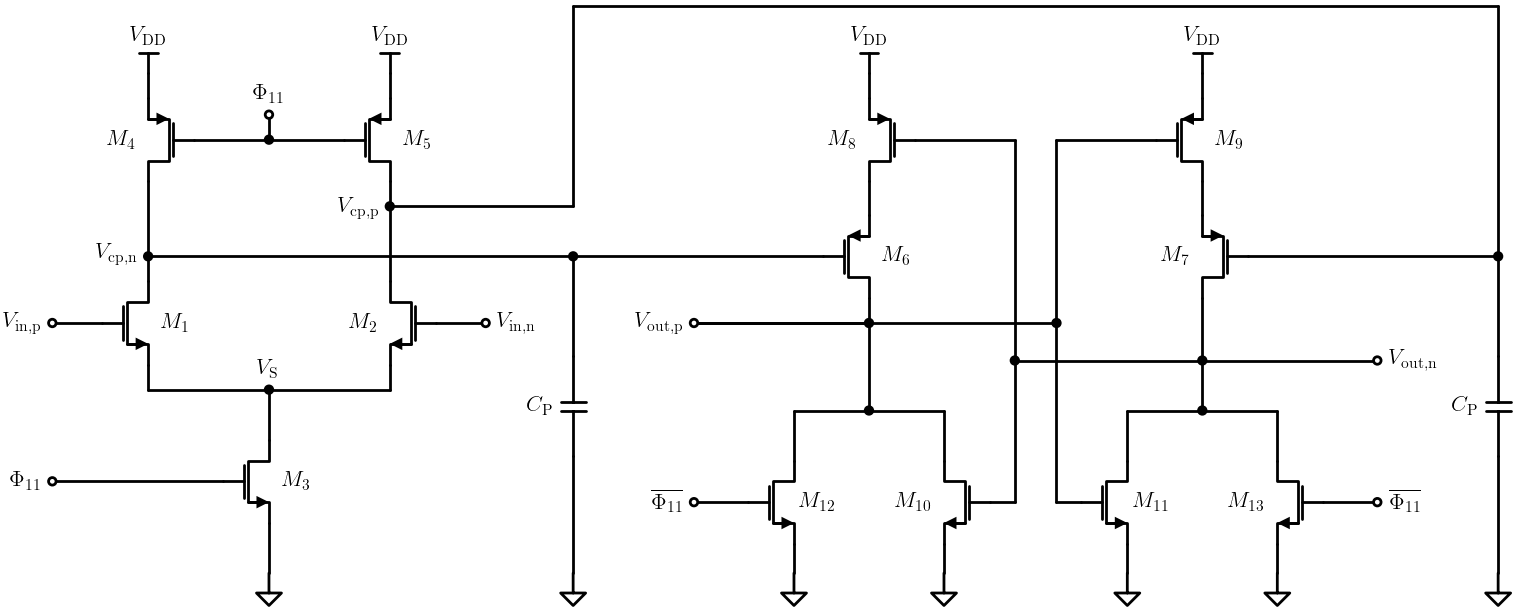

In [131]:
# Draw Elzakker DT comparator without W/L
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=16)
    
    # Pre-Amplifier
    # M1 / M4
    elm.Dot(open=True).label('$V_\mathrm{in,p}$', loc='left', ofst=0.15)
    startDot = d.here
    elm.Line().right().length(1)
    M1 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label('$M_1$', ofst=-1.75).reverse()
    elm.Line().at(M1.drain).up().length(0.5).dot().label('$V_\mathrm{cp,n}$', loc='top', ofst=(0.25, 0.15))
    VcpnDot = d.here
    elm.Line().up().length(1.5)
    M4 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label('$M_4$', ofst=0.25)
    elm.Line().at(M4.source).up().length(0.5)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M4.gate).right().length(1.5).dot()
    d.push()
    elm.Line().up().length(0.5)
    elm.Dot(open=True).label('$\Phi_{11}$', loc='top', ofst=0.15)
    clkDot = d.here
    d.pop()

    # M2 / M5
    elm.Line().right().length(1.5)
    M5 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label('$M_5$', ofst=-1.75).reverse()
    elm.Line().at(M5.source).up().length(0.5)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    vddDot = d.here
    elm.Line().at(M5.drain).down().length(0.5).dot().label('$V_\mathrm{cp,p}$', loc='top', ofst=(0.25, -0.15))
    VcppDot = d.here
    elm.Line().down().length(1.5)
    M2 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label('$M_2$', ofst=0.25)
    elm.Line().at(M2.gate).right().length(1)
    elm.Dot(open=True).label('$V_\mathrm{in,n}$', loc='right', ofst=0.15)

    # VS
    elm.Line().at(M1.source).down().length(0.5)
    elm.Line().right().tox(clkDot).dot().label('$V_\mathrm{S}$', loc='top', ofst=(1.15, 0.15))
    elm.Line().at(M2.source).down().length(0.5)
    elm.Line().left().tox(clkDot)

    # M3
    elm.Line().down().length(1)
    M3 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label('$M_3$', ofst=-1.75).reverse()
    elm.Line().at(M3.gate).left().tox(startDot)
    elm.Dot(open=True).label('$\Phi_{11}$', loc='left', ofst=0.15)
    elm.Line().at(M3.source).down().length(1)
    gndDot = d.here
    elm.GroundSignal()
    
    # Latch stage
    # Cpn
    elm.Line().at(VcpnDot).right().length(8.5).dot()
    CpnDot = d.here
    d.push()
    elm.Line().down().length(2)
    # elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    Cpn = elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15)
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # M6
    d.pop()
    elm.Line().right().length(5)
    M6 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label('$M_6$', ofst=-1.75).reverse()
    elm.Line().at(M6.drain).down().length(0.5).dot()

    # Voutp
    d.push()
    elm.Line().left().length(3.5)
    elm.Dot(open=True).label('$V_\mathrm{out,p}$', loc='left', ofst=0.15)
    voutpDot = d.here
    d.pop()

    # M10 / M12
    elm.Line().down().length(1.75).dot()
    d.push()
    elm.Line().left().length(1.5)
    elm.Line().down().length(1.0)
    M12 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label('$M_{12}$', ofst=-1.75).reverse()
    elm.Line().at(M12.gate).left().tox(voutpDot)
    elm.Dot(open=True).label('$\overline{\Phi_{11}}$', loc='left', ofst=0.15)
    elm.Line().at(M12.source).down().toy(gndDot)
    elm.GroundSignal()
    d.pop()
    elm.Line().right().length(1.5)
    elm.Line().down().length(1.0)
    M10 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label('$M_{10}$', ofst=0.25)
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # M8
    elm.Line().at(M6.source).up().toy(M5.drain)
    M8 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label('$M_8$', ofst=0.25)
    elm.Line().at(M8.source).up().toy(vddDot)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M8.gate).right().length(2)
    elm.Line().down().toy(M10.gate)
    xofM8M10con = d.here
    elm.Line().left().tox(M10.gate)

    # M11 / M13
    elm.Line().at(voutpDot).right().length(7.25).dot()
    d.push()
    elm.Line().down().toy(M10.gate)
    elm.Line().right().length(0.5)
    M11 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label('$M_{11}$', ofst=-1.75).reverse()
    elm.Line().at(M11.source).down().toy(gndDot)
    elm.GroundSignal()
    elm.Line().at(M11.drain).up().length(1.0)
    elm.Line().right().length(1.5).dot()
    d.push()
    elm.Line().right().length(1.5)
    elm.Line().down().length(1.0)
    M13 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label('$M_{13}$', ofst=0.25)
    elm.Line().at(M13.source).down().toy(gndDot)
    elm.GroundSignal()
    d.pop()
    elm.Line().up().length(1).dot()
    d.push()
    elm.Line().right().length(3.5)
    elm.Dot(open=True).label('$V_\mathrm{out,n}$', loc='right', ofst=0.15)
    voutnDot = d.here
    elm.Line().at(M13.gate).right().tox(voutnDot)
    elm.Dot(open=True).label('$\overline{\Phi_{11}}$', loc='right', ofst=0.15)
    d.pop()
    d.push()
    elm.Line().left().tox(xofM8M10con).dot()

    # M7
    d.pop()
    elm.Line().up().toy(M6.drain)
    M7 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label('$M_7$', ofst=0.25)
    elm.Line().at(M7.source).up().toy(M8.drain)

    # M9
    M9 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label('$M_9$', ofst=-1.75).reverse()
    elm.Line().at(M9.source).up().toy(vddDot)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M9.gate).left().length(2)
    elm.Line().down().toy(voutpDot)

    # Cpn
    elm.Line().at(M7.gate).right().length(5).dot()
    d.push()
    elm.Line().down().length(2)
    # elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    Cpp = elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15)
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # Connection back to Vcpp
    d.pop()
    elm.Line().up().length(5)
    elm.Line().left().tox(CpnDot)
    elm.Line().down().toy(VcppDot)
    elm.Line().left().tox(VcppDot)

    # Save the schematic
    d.save('figures/comparator/discrete_time/DT_comparator_Elzakker_circuit.svg')
    d.save('figures/comparator/discrete_time/DT_comparator_Elzakker_circuit.pdf')

In [132]:
# Packages
from pygmid import Lookup as lk
import scipy.constants as sc
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

plt.close("all")
# %matplotlib qt
%matplotlib inline

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 14)

In [133]:
# read table data
# List of parameters: VGS, VDS, VSB, VTH, VDSS, L, W, NFING, ID, GM, GMB, GDS, CGG, CGB, CGD, CGS, CDD, CSS, STH, SFL
lv_nmos = lk('../data/sg13g2_lv_nmos.mat')
lv_pmos = lk('../data/sg13g2_lv_pmos.mat')

Sizing of M1, M2 and M3

In [134]:
# Define the given parameters as taken from the specification table or inital guesses

# Power Supply Voltage
VDD = 1.50
Vcm = VDD / 2

# All transistors have 0.13um:
# Switches have minimum length for fast switching.
# Diff. pair has minimum length for maximum gm and good matching.
# One could argue to increase L, to decrease the drain-source leakage current during OFF state. 
# However, if the comparator is slower more current flows into it and this current difference clearly is bigger than the leakage current.
l = 0.13

In [135]:
# Sizing of W/L ratios of M1, M2 and M3 with gm/ID methodology - FIRST APPROACH

# Since the gm/ID methodology is for circuits in class-A category, which means that they are operated with constant bias current, 
# but a DT comparator is a switched circuit with dynamic current consumption, meaning that the gm/ID methodology is not suited.
# Anyway, sizing is tried for the case clock = 1 and t = 0 and vinp = vinn = Vcm.
# This case is the most important for the DAC output loading.

# Choosing gm/ID for input diff. pair in weak inversion
# Set gm_id_m12 ~ 20, during conversion M1 / M2 will go further into weak inversion.
# Will be defined by vdss_m3 and therefore by w_m3.

# M1 / M2 should be on the edge of weak inversion when vinp = vinn and clock = 1.
# vgs_m1 = vgs_m2 = vinp - vdss_m3 <= vth_m1 ~ 0.5V
# Since vinp = Vcm = 0.75V, vdss_m3 >= 0.25V.
# After some iterations, the following vdss_m3 is chosen.
vdss_m3 = 0.3

# Lookup M1 / M2
# In OFF state (clock = 0) the Cp capacitors are loaded to vcpp = vcpn = VDD via M4 / M5.
# Hence, when clock = 1, the Cp capacitors start to discharge. At t = 0, vds_m12 = VDD - vdss_m3.
vds_m12 = VDD - vdss_m3
print(f"vds_m12 = {round(float(vds_m12), 2)}V")

# Vgs of M1 / M2
vgs_m12 = Vcm - vdss_m3
print(f"vgs_m12 = {round(float(vgs_m12), 2)}V")

# Change vdss_m3 until gm_id_m12_wi ~ 20
gm_id_m12_wi = lv_nmos.lookup('GM_ID', L=0.13, VGS=vgs_m12, VDS=vds_m12, VSB=vdss_m3)
print(f"gm_id_m12_wi = {round(float(gm_id_m12_wi), 2)}S/A")

# Choose w_m12 and look what happens with the peak current and cgg of M1 / M2
id_w_m12 = lv_nmos.lookup('ID_W', GM_ID=gm_id_m12_wi, L=0.13, VDS=vds_m12, VSB=vdss_m3)
w_m12 = 60.0
i_m12 = id_w_m12 * w_m12 # current per NMOS, itail = 2 * i_m12
print(f"i_m12 = {round(float(i_m12) * 1e6, 2)}uA")

# gm
gm_m12 = gm_id_m12_wi * i_m12
print(f"gm_m12 = {round(float(gm_m12) * 1e6, 2)}uS")

# Cgg increases (approx.) linearly with w_m12
# Since small input capacitance is needed for the C-DAC, w_m12 should be chosen to be small as possible.
cgg_gm_m12 = lv_nmos.lookup('CGG_GM', GM_ID=gm_id_m12_wi, L=0.13, VDS=vds_m12, VSB=vdss_m3)
cgg_m12 = cgg_gm_m12 * gm_m12 # = Cin
print(f"cgg_m12 = {round(float(cgg_m12) * 1e15, 2)}fF")

# STH thermal noise psd at 1 Hz
sth_gm_m12 = lv_nmos.lookup('STH_GM', GM_ID=gm_id_m12_wi, L=0.13, VDS=vds_m12, VSB=vdss_m3)
sth_m12 = sth_gm_m12 * gm_m12
print(f"sth_m12 = {round(float(sth_m12 * 1e24), 2)} pV²/Hz (thermal noise psd at 1 Hz)")

# Gamma
T = 300 # in Kelvin
gamma_m12_wi = sth_m12 / (4 * sc.k * T * gm_m12)
print(f"gamma_m12_wi = {round(float(gamma_m12_wi), 2)}")

# SFL flicker noise psd at 1 Hz
sfl_gm_m12 = lv_nmos.lookup('SFL_GM', GM_ID=gm_id_m12_wi, L=0.13, VDS=vds_m12, VSB=vdss_m3)
sfl_m12 = sfl_gm_m12 * gm_m12
print(f"sfl_m12 = {round(float(sfl_m12 * 1e18), 2)} nV²/Hz (flicker noise psd at 1 Hz)")

# Flicker corner frequency (fco)
fco_m12 = lv_nmos.lookup('SFL_STH', GM_ID=gm_id_m12_wi, L=0.13, VDS=vds_m12, VSB=vdss_m3)
print(f"fco_m12 = {round(float(fco_m12 * 1e-6), 2)} MHz (flicker corner frequency @ flicker noise PSD = thermal noise PSD)")

# Verify Vgs again
vgs_m12 = lv_nmos.lookupVGS(GM_ID=gm_id_m12_wi, L=0.13, VDS=vds_m12, VSB=vdss_m3)
print(f"vgs_m12 = {round(float(vgs_m12), 2)}V (verified)")

print('NMOS M1: W =', w_m12, 'um, L =', l, 'um')
print('NMOS M2: W =', w_m12, 'um, L =', l, 'um')

# Lookup M3
id_w_m3 = lv_nmos.lookup('ID_W', L=0.13, VGS=VDD, VDS=vdss_m3, VSB=0)
itail = 2 * i_m12
print(f"itail = {round(float(itail) * 1e6, 2)}uA")
w_m3 = itail / id_w_m3
w_m3 = round(w_m3, 2)
print('NMOS M3: W =', w_m3, 'um, L =', l, 'um')

# Conclusion: 
# If one wants to design the diff. pair to be in weak inversion, 
# the width of M1 / M2 is huge and also the input capacitance is too big for the C-DAC.
# On the other side, the input-referred flicker noise is reduced and fco is much smaller.
# Since the noise is also impacted by the capacitors Cp,
# a second sizing approach is done where the diff. pair operate in strong inversion.


vds_m12 = 1.2V
vgs_m12 = 0.45V
gm_id_m12_wi = 18.91S/A
i_m12 = 232.29uA
gm_m12 = 4391.65uS
cgg_m12 = 84.45fF
sth_m12 = 56.39 pV²/Hz (thermal noise psd at 1 Hz)
gamma_m12_wi = 0.78
sfl_m12 = 113.99 nV²/Hz (flicker noise psd at 1 Hz)
fco_m12 = 1.97 MHz (flicker corner frequency @ flicker noise PSD = thermal noise PSD)
vgs_m12 = 0.45V (verified)
NMOS M1: W = 60.0 um, L = 0.13 um
NMOS M2: W = 60.0 um, L = 0.13 um
itail = 464.58uA
NMOS M3: W = 1.0 um, L = 0.13 um


In [136]:
# Sizing of W/L ratios of M1, M2 and M3 with gm/ID methodology - SECOND APPROACH

# Choosing gm/ID for input diff. pair in strong inversion
# Set gm_id_m12 ~ 7. Will be defined by vdss_m3 and therefore by w_m3.

# Set vdss_m3 for gm_id_m12 ~ 7
vdss_m3 = 0.065

# Lookup M1 / M2
# In OFF state (clock = 0) the Cp capacitors are loaded to vcpp = vcpn = VDD via M4 / M5.
# Hence, when clock = 1, the Cp capacitors start to discharge. At t = 0, vds_m12 = VDD - vdss_m3.
vds_m12 = VDD - vdss_m3
print(f"vds_m12 = {round(float(vds_m12), 2)}V")

# Vgs of M1 / M2
vgs_m12 = Vcm - vdss_m3
print(f"vgs_m12 = {round(float(vgs_m12), 2)}V")

# Change vdss_m3 until gm_id_m12 ~ 20
gm_id_m12_si = lv_nmos.lookup('GM_ID', L=0.13, VGS=vgs_m12, VDS=vds_m12, VSB=vdss_m3)
print(f"gm_id_m12_si = {round(float(gm_id_m12_si), 2)}S/A")

# Choose w_m12 and look what happens with the peak current and cgg of M1 / M2
id_w_m12 = lv_nmos.lookup('ID_W', GM_ID=gm_id_m12_si, L=0.13, VDS=vds_m12, VSB=vdss_m3)
w_m12 = 1.0
i_m12 = id_w_m12 * w_m12 # current per NMOS, itail = 2 * i_m12
print(f"i_m12 = {round(float(i_m12) * 1e6, 2)}uA")

# gm
gm_m12 = gm_id_m12_si * i_m12
print(f"gm_m12 = {round(float(gm_m12) * 1e6, 2)}uS")

# Cgg increases (approx.) linearly with w_m12
# Since small input capacitance is needed for the C-DAC, w_m12 should be chosen to be small as possible.
cgg_gm_m12 = lv_nmos.lookup('CGG_GM', GM_ID=gm_id_m12_si, L=0.13, VDS=vds_m12, VSB=vdss_m3)
cgg_m12 = cgg_gm_m12 * gm_m12 # = Cin
print(f"cgg_m12 = {round(float(cgg_m12) * 1e15, 2)}fF")

# STH thermal noise psd at 1 Hz
sth_gm_m12 = lv_nmos.lookup('STH_GM', GM_ID=gm_id_m12_si, L=0.13, VDS=vds_m12, VSB=vdss_m3)
sth_m12 = sth_gm_m12 * gm_m12
print(f"sth_m12 = {round(float(sth_m12 * 1e24), 2)} pV²/Hz (thermal noise psd at 1 Hz)")

# Gamma
T = 300 # in Kelvin
gamma_m12_si = sth_m12 / (4 * sc.k * T * gm_m12)
print(f"gamma_m12_si = {round(float(gamma_m12_si), 2)}")

# SFL flicker noise psd at 1 Hz
sfl_gm_m12 = lv_nmos.lookup('SFL_GM', GM_ID=gm_id_m12_si, L=0.13, VDS=vds_m12, VSB=vdss_m3)
sfl_m12 = sfl_gm_m12 * gm_m12
print(f"sfl_m12 = {round(float(sfl_m12 * 1e18), 2)} nV²/Hz (flicker noise psd at 1 Hz)")

# Flicker corner frequency (fco)
fco_m12 = lv_nmos.lookup('SFL_STH', GM_ID=gm_id_m12_si, L=0.13, VDS=vds_m12, VSB=vdss_m3)
print(f"fco_m12 = {round(float(fco_m12 * 1e-6), 2)} MHz (flicker corner frequency @ flicker noise PSD = thermal noise PSD)")

# Verify Vgs again
vgs_m12 = lv_nmos.lookupVGS(GM_ID=gm_id_m12_si, L=0.13, VDS=vds_m12, VSB=vdss_m3)
print(f"vgs_m12 = {round(float(vgs_m12), 2)}V (verified)")

print('NMOS M1: W =', w_m12, 'um, L =', l, 'um')
print('NMOS M2: W =', w_m12, 'um, L =', l, 'um')

# Lookup M3
id_w_m3 = lv_nmos.lookup('ID_W', L=0.13, VGS=VDD, VDS=vdss_m3, VSB=0)
itail = 2 * i_m12
print(f"itail = {round(float(itail) * 1e6, 2)}uA")
w_m3 = itail / id_w_m3
w_m3 = round(w_m3, 1)
print('NMOS M3: W =', w_m3, 'um, L =', l, 'um')

vds_m12 = 1.44V
vgs_m12 = 0.69V
gm_id_m12_si = 6.84S/A
i_m12 = 63.71uA
gm_m12 = 435.92uS
cgg_m12 = 1.61fF
sth_m12 = 6.2 pV²/Hz (thermal noise psd at 1 Hz)
gamma_m12_si = 0.86
sfl_m12 = 188.56 nV²/Hz (flicker noise psd at 1 Hz)
fco_m12 = 30.44 MHz (flicker corner frequency @ flicker noise PSD = thermal noise PSD)
vgs_m12 = 0.68V (verified)
NMOS M1: W = 1.0 um, L = 0.13 um
NMOS M2: W = 1.0 um, L = 0.13 um
itail = 127.41uA
NMOS M3: W = 1.0 um, L = 0.13 um


Sizing of remaining transistors with intuition, layout matching and simulation

In [137]:
# Sizing of remaining transistors with intuition, layout matching and simulation

# M4 & M5
# Via M4 and M5 the capacitors Cp are charged up to VDD during the OFF time of the clock.
# Since the OFF time is much larger than the ON time, the sizing of these transistors is not critical and only has to fit in the layout well.
# Therefore, the length L is again chosen to be 0.13um. The width W is set to 1um to match the differential pair transistors.
w_m45 = 1.0

# M6 to M13
# These transistors form a SR latch topology. For fast response time all lengths are set to its minimum of 0.13um.
# One could argue to increase L, to decrease the drain-source leakage current in the OFF state. However, if the comparator is slower more current flows into it and this current difference clearly is bigger than the leakage current. \\
# The widths are chosen in a way to match the transistors well during layouting.

# M8 / M10 and M9 / M11 are cross-coupled inverters for the positive feedback of the latch. 
# M10 and M11 are minimum sized. Due to faster electron mobility the PMOS M8 and M9 are twice as big as the NMOS M10 and M11 resulting into two finger with 1um each.
w_m1011 = 1.0
w_m89 = 2.0

# M12 and M13 are reset switches which are minimum sized and W is chosen for good matching.
w_m1213 = 1.0

# For a good matching layout, M6 and M7 are sized the same as M8 and M9 (two finger with 1um each).
w_m67 = 2.0

Total input-referred noise

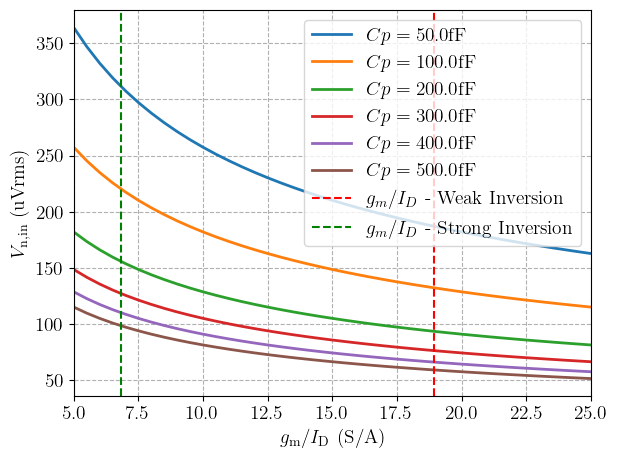

The total input-referred noise for gm/ID = 6.84S/V and Cp = 50.0fF equals 311.21uVrms.
The total input-referred noise for gm/ID = 6.84S/V and Cp = 100.0fF equals 220.06uVrms.
The total input-referred noise for gm/ID = 6.84S/V and Cp = 200.0fF equals 155.6uVrms.
The total input-referred noise for gm/ID = 6.84S/V and Cp = 300.0fF equals 127.05uVrms.
The total input-referred noise for gm/ID = 6.84S/V and Cp = 400.0fF equals 110.03uVrms.
The total input-referred noise for gm/ID = 6.84S/V and Cp = 500.0fF equals 98.41uVrms.

The total input-referred noise for gm/ID = 18.91S/V and Cp = 50.0fF equals 187.22uVrms.
The total input-referred noise for gm/ID = 18.91S/V and Cp = 100.0fF equals 132.39uVrms.
The total input-referred noise for gm/ID = 18.91S/V and Cp = 200.0fF equals 93.61uVrms.
The total input-referred noise for gm/ID = 18.91S/V and Cp = 300.0fF equals 76.43uVrms.
The total input-referred noise for gm/ID = 18.91S/V and Cp = 400.0fF equals 66.19uVrms.
The total input-referred noise fo

In [138]:
# Plot total (integrated) input-referred noise for several Cp against gm/ID
# Ngspice does not support transient noise analysis right now.
# Luckily, there is an estimation formula for total (integrated) input-referred noise of Elzakker's DT comparator.
# From Elzakker's paper "A 10-bit Charge-Redistribution ADC Consuming 1.9uW at 1MS/s" (8):
# Vn_in_rms = sqrt(4 * k * T * 1 / (Vth * Cp) * 1 / (gm / ID))

T = 300 # in Kelvin
Vth = 0.5 # estimate approx. 0.5V for LV NMOS

# Calculate input noise for a specific range of gm_id
gm_id_vec = np.arange(5, 25 + 0.5, 0.5)  # 5S/A to 25S/A, 0.5S/A steps
CP_vec = np.array([50e-15, 100e-15, 200e-15, 300e-15, 400e-15, 500e-15])
Vn_in_rms = np.empty((len(CP_vec), len(gm_id_vec)))
gamma = 1 # One could also use gamma_m12_si or gamma_m12_wi from above.
for i in range(len(CP_vec)):
  Vn_in_rms[i] = np.sqrt((4 * sc.k * T * gamma) / (Vth * CP_vec[i]) * (1 / gm_id_vec))

fig1 = plt.figure(tight_layout = True)
for i in range(len(CP_vec)):
  plt.plot(gm_id_vec, Vn_in_rms[i] * 1e6, linewidth = 2, label = f"$Cp = {round(float(CP_vec[i]) * 1e15, 2)}$fF")
plt.axvline(gm_id_m12_wi, color='r', linestyle='--', label=r'$g_{m} / I_{D}$ - Weak Inversion')
plt.axvline(gm_id_m12_si, color='g', linestyle='--', label=r'$g_{m} / I_{D}$ - Strong Inversion')
plt.xlabel('$g_\mathrm{m} / I_\mathrm{D}$ (S/A)')
plt.ylabel('$V_\mathrm{n,in}$ (uVrms)')
plt.grid(visible = True, linestyle='--')
plt.xlim((5, 25))
plt.legend()
plt.show()
fig1.savefig("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Cp_Elzakker.svg", bbox_inches='tight')
fig1.savefig("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Cp_Elzakker.pdf", bbox_inches='tight')
np.savetxt("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Cp_Elzakker.csv", 
           np.column_stack((gm_id_vec, Vn_in_rms[0] * 1e6, Vn_in_rms[1] * 1e6, Vn_in_rms[2] * 1e6, Vn_in_rms[3] * 1e6, Vn_in_rms[4] * 1e6, Vn_in_rms[5] * 1e6)), 
           comments = "", header = "gm_id_vec,Vn_in_rms_0,Vn_in_rms_1,Vn_in_rms_2,Vn_in_rms_3,Vn_in_rms_4,Vn_in_rms_5", delimiter = ",")

for i in range(len(CP_vec)):
  print(f"The total input-referred noise for gm/ID = {round(float(gm_id_m12_si), 2)}S/V and Cp = {round(float(CP_vec[i]) * 1e15, 2)}fF equals {round(np.sqrt((4 * sc.k * T) / (Vth * CP_vec[i]) * (1 / gm_id_m12_si)) * 1e6, 2)}uVrms.")

print("")

for i in range(len(CP_vec)):
  print(f"The total input-referred noise for gm/ID = {round(float(gm_id_m12_wi), 2)}S/V and Cp = {round(float(CP_vec[i]) * 1e15, 2)}fF equals {round(np.sqrt((4 * sc.k * T) / (Vth * CP_vec[i]) * (1 / gm_id_m12_wi)) * 1e6, 2)}uVrms.")

# Since the total output noise of the bio-signal amplifier lies around 100uVrms, the input-referred noise of the DT comparator should lie in the same order of magnitude.
# If small transistors for the input diff. pair are used, the gm/ID is smaller (strong inversion) and therefore Cp has to be bigger to reach an input-referred noise of <100uVrms.
# For bigger transistors, the diff. pair operates in weak inversion and the Cp can be chosen to be smaller.
# For example, for gm/ID = 18.91 (Weak Inversion) a capacitor of Cp = 200fF reaches 93.6uVrms and for gm/ID = 6.84 (Strong Inversion) a capacitor of Cp = 500fF reaches 98.41uVrms.
# Hence, CP must be more than twice as large for strong inversion as for weak inversion.
# Depending on the used capacitor technology, the strong inversion design may need more area than the weak inversion design even though the input pair is 60 times smaller.
# Keep in mind that with bigger Cp's the discharging lasts longer and therefore the propagation delay is much higher. Furthermore, this results into a much higher power consumption (see later).

Propagation delay

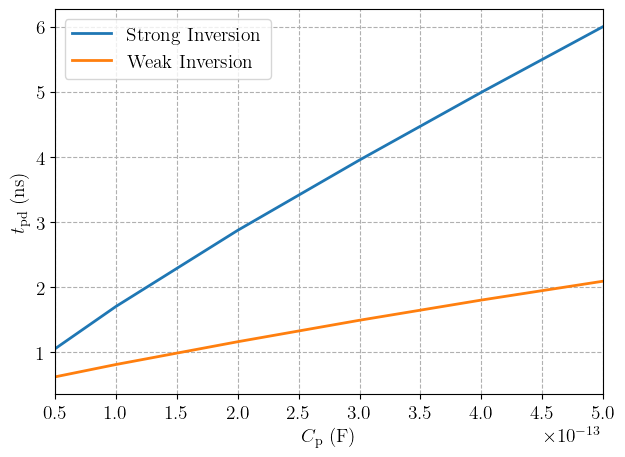

In [139]:
# Simulate and plot propagation delay against Cp
# Settings: VDD = 1.5V, T = 27°C, TT corner, Vcm = 0.75V, dVin = 10mV (approx. 1LSB at 7-Bit fully-differential), strong inversion and weak inversion input stage, Cload = 10fF

CP_vec = np.array([50e-15, 100e-15, 200e-15, 300e-15, 400e-15, 500e-15])

# Strong Inversion: M1, M2 = 1u
tpd_si = [1.05, 1.70, 2.87, 3.95, 4.99, 6] # in ns (linear relation)

# Weak Inversion: M1, M2 = 60u
tpd_wi = [0.62, 0.81, 1.16, 1.49, 1.80, 2.09] # in ns (linear relation)

fig2 = plt.figure(tight_layout = True)
plt.plot(CP_vec, tpd_si, linewidth = 2, label = "Strong Inversion")
plt.plot(CP_vec, tpd_wi, linewidth = 2, label = "Weak Inversion")
plt.xlabel('$C_\mathrm{p}$ (F)')
plt.ylabel('$t_\mathrm{pd}$ (ns)')
plt.grid(visible = True, linestyle='--')
plt.xlim((50e-15, 500e-15))
plt.legend()
plt.show()
fig2.savefig("figures/comparator/discrete_time/tpd_against_Cp.svg", bbox_inches='tight')
fig2.savefig("figures/comparator/discrete_time/tpd_against_Cp.pdf", bbox_inches='tight')
np.savetxt("figures/comparator/discrete_time/tpd_against_Cp.csv", 
           np.column_stack((CP_vec, tpd_si, tpd_wi)),
           comments = "", header = "CP_vec,tpd_si,tpd_wi", delimiter = ",")

# Conclusion: 
# As expected, the higher the capacitors Cp, the higher the propagation delay.
# If the input diff. pair is in strong inversion, the propagation delay is much higher for higher capacitors Cp compared to weak inversion.
# Anyway, both operating points result into a linear relation between propagation delay and capacitors Cp.

Energy per Conversion

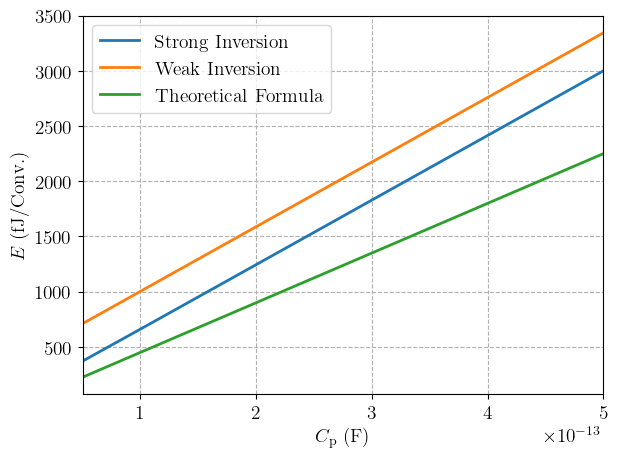

In [140]:
# Simulate and plot fJ/conv. against Cp
# Settings: VDD = 1.5V, T = 27°C, TT corner, Vcm = 0.75V, dVin = 10mV (approx. 1LSB at 7-Bit fully-differential), strong inversion and weak inversion input stage, Cload = 10fF

CP_vec = np.array([50e-15, 100e-15, 200e-15, 300e-15, 400e-15, 500e-15])

# Strong Inversion: M1, M2 = 1u
epc_si = [371.06, 660.81, 1244.78, 1829.68, 2414.83, 3000.06] # in fJ/Conv. (linear relation)

# Weak Inversion: M1, M2 = 60u
epc_wi = [710.50, 1003.07, 1588.53, 2173.87, 2759.06, 3344.4] # in fJ/Conv. (linear relation)

# Theoretical formula
epc_formula = np.empty(len(CP_vec))
for i in range(len(CP_vec)):
  epc_formula[i] = 2 * CP_vec[i] * VDD**2 * 1e15

fig3 = plt.figure(tight_layout = True)
plt.plot(CP_vec, epc_si, linewidth = 2, label = "Strong Inversion")
plt.plot(CP_vec, epc_wi, linewidth = 2, label = "Weak Inversion")
plt.plot(CP_vec, epc_formula, linewidth = 2, label = "Theoretical Formula")
plt.xlabel('$C_\mathrm{p}$ (F)')
plt.ylabel('$E$ (fJ/Conv.)')
plt.grid(visible = True, linestyle='--')
plt.xlim((50e-15, 500e-15))
plt.legend()
plt.show()
fig3.savefig("figures/comparator/discrete_time/epc_against_Cp.svg", bbox_inches='tight')
fig3.savefig("figures/comparator/discrete_time/epc_against_Cp.pdf", bbox_inches='tight')
np.savetxt("figures/comparator/discrete_time/epc_against_Cp.csv", 
           np.column_stack((CP_vec, epc_si, epc_wi, epc_formula)),
           comments = "", header = "CP_vec,epc_si,epc_wi,epc_formula", delimiter = ",")

# Conclusion:
# As expected, the higher the capacitors Cp, the higher the energy per conversion.
# The theoretical formula yields the bottom line of energy per conversion.
# In general, if the diff. pair operates in strong inversion, the DT comparator needs less energy per conversion.
# Strong and weak inversion have a linear relation of energy per conversion to capacitors Cp. In fact, their curves are just shifted by a constant offset.

Input dc Offset

In [141]:
# Input dc Offset Simulation
# Settings: VDD = 1.5V, T = 27°C, TT corner, Vcm = 0.75V, strong inversion and weak inversion input stage, Cload = 10fF
# Unfortunately, there is no formula to estimate the input dc offset for Elzakker's comparator. Therefore, it has to be simulated with a ramp at the input.
# The lower the slope of the ramp, the more precise the result. However, the simulation also takes longer. 
# Consequently, the highest slope is sought in order to achieve a fast simulation without losing too much precision in the dc offset. 
# With a voltage range of 50mV in 10us, resulting into a slope of 5mV/1us, a input dc offset of 5.02 mV is reached.
# The dc offset should be smaller than 0.5 LSB of the DAC.
# If the maximum resolution of the DAC is N-Bit, 1 LSB equals VDD/2^N (single-ended output) or 2*VDD/2^N (fully-differential output).
# Therefore, 0.5 LSB of a fully-differential DAC equals 1 LSB of a single-ended DAC.
N = 8
half_lsb = VDD / 2**N
print(f"0.5 LSB of a fully-differential {N}-Bit DAC equals {round(half_lsb * 1e3, 2)}mV.")

N = 7
half_lsb = VDD / 2**N
print(f"0.5 LSB of a fully-differential {N}-Bit DAC equals {round(half_lsb * 1e3, 2)}mV.")

# Store N = 7 for other Jupyter Notebooks
%store N

# Since the input dc offset gets worse over corner, Vcm and temperature (see CACE) some headroom for the input dc offset should be left.
# In the end, a maximum resolution of 7-Bit is used for the DAC. This allows for a maximum input dc offset of 11.72mV.

0.5 LSB of a fully-differential 8-Bit DAC equals 5.86mV.
0.5 LSB of a fully-differential 7-Bit DAC equals 11.72mV.
Stored 'N' (int)


Summary and final values

In [142]:
# Final selection of Cp

# Summary:
# If Cp increases, the input-referred noise decreases but the propagation delay and the energy per conversion increases.
# In strong inversion the DT comparator needs less energy per conversion but the propagation delay increases with higher capacitors Cp compared to weak inversion operation.
# Remember, higher propagation delay is not that crucial, as long as it is less than 1/fclk = 125ns. Furthermore, the area also has relaxed constraints.
# However, energy per conversion and input capacitance is important. Especially the input capacitance since it is loading the DAC.
# Therefore, strong inversion is chosen.
# After analyzing the most important trade-offs of the size of Cp, Cp is chosen to be 300fF.
# Later, it is shown that the input-referred noise will further decrease by using the dynamic-biasing comparator.
# It might be a good idea to make Cp programmable in the future to control the trade-off between propagation delay, input-referred noise and energy per conversion.
Cp = CP_vec[3]

# Calculate total (integrated) input-referred noise for CP
Vn_in_rms_final = np.sqrt((4 * sc.k * T * gamma) / (Vth * Cp) * (1 / gm_id_m12_si))

# Get propagation delay (simulated)
tpd = tpd_si[3]

# Get energy per conversion (simulated)
epc = epc_si[3]

# Get input dc offset (simulated)
Voffs_in = 5.02e-3

# Get average input capacitance (simulated)
Cinp = 1.90e-15
Cinn = 1.42e-15

In [143]:
# print out final design values
print('Elzakker DT comparator W/L ratios:')
print('------------------------------------')
print('Differential Input Stage')
print('NMOS M1: W =', w_m12,'um, L =', l,'um')
print('NMOS M2: W =', w_m12,'um, L =', l,'um')
print('NMOS M3: W =', w_m3,'um, L =', l,'um')
print('PMOS M4: W =', w_m45,'um, L =', l,'um')
print('PMOS M5: W =', w_m45,'um, L =', l,'um')
print('Capacitor Cp =', round(float(Cp * 1e15), 2),'fF')
print('------------------------------------')
print('Output Latch')
print('PMOS M6: W =', w_m67,'um, L =', l,'um')
print('PMOS M7: W =', w_m67,'um, L =', l,'um')
print('PMOS M8: W =', w_m89,'um, L =', l,'um')
print('PMOS M9: W =', w_m89,'um, L =', l,'um')
print('NMOS M10: W =', w_m1011,'um, L =', l,'um')
print('NMOS M11: W =', w_m1011,'um, L =', l,'um')
print('NMOS M12: W =', w_m1213,'um, L =', l,'um')
print('NMOS M13: W =', w_m1213,'um, L =', l,'um')
print('------------------------------------')
print('Design Results')
print('Max. input capacitance: Cin =', round(float(cgg_m12) * 1e15, 2), 'fF (gm/ID)')
print('Average positive input capacitance from 1Hz to 1GHz: Cinp =', round(Cinp * 1e15, 2), 'fF (simulated)')
print('Average negative input capacitance from 1Hz to 1GHz: Cinn =', round(Cinn * 1e15, 2), 'fF (simulated)')
print('Max. total (integrated) input-referred noise: Vn_in_rms =', round(float(Vn_in_rms_final) * 1e6, 2), 'uVrms (gm/ID + formula)')
print('Propagation delay: tpd =', round(float(tpd), 2), 'ns (simulated)')
print('Energy per conversion: epc =', round(float(epc), 2), 'fJ/conv (simulated)')
print('Max. input dc offset (= 0.5 LSB): Voffs_in_max =', round(float(half_lsb * 1e3), 2), 'mV (estimated)')
print('Input dc offset: Voffs_in =', round(float(Voffs_in * 1e3), 2), 'mV (simulated)')
print('------------------------------------')

Elzakker DT comparator W/L ratios:
------------------------------------
Differential Input Stage
NMOS M1: W = 1.0 um, L = 0.13 um
NMOS M2: W = 1.0 um, L = 0.13 um
NMOS M3: W = 1.0 um, L = 0.13 um
PMOS M4: W = 1.0 um, L = 0.13 um
PMOS M5: W = 1.0 um, L = 0.13 um
Capacitor Cp = 300.0 fF
------------------------------------
Output Latch
PMOS M6: W = 2.0 um, L = 0.13 um
PMOS M7: W = 2.0 um, L = 0.13 um
PMOS M8: W = 2.0 um, L = 0.13 um
PMOS M9: W = 2.0 um, L = 0.13 um
NMOS M10: W = 1.0 um, L = 0.13 um
NMOS M11: W = 1.0 um, L = 0.13 um
NMOS M12: W = 1.0 um, L = 0.13 um
NMOS M13: W = 1.0 um, L = 0.13 um
------------------------------------
Design Results
Max. input capacitance: Cin = 1.61 fF (gm/ID)
Average positive input capacitance from 1Hz to 1GHz: Cinp = 1.9 fF (simulated)
Average negative input capacitance from 1Hz to 1GHz: Cinn = 1.42 fF (simulated)
Max. total (integrated) input-referred noise: Vn_in_rms = 127.05 uVrms (gm/ID + formula)
Propagation delay: tpd = 3.95 ns (simulated)
Energ

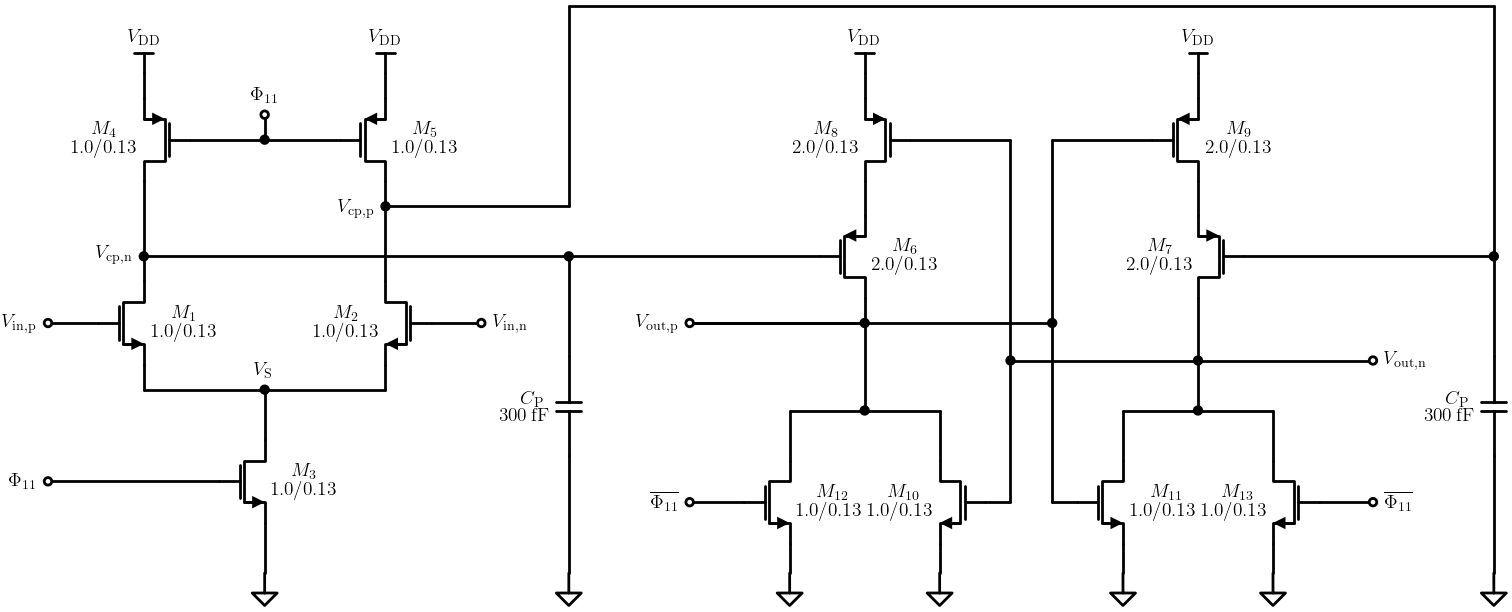

In [144]:
# Draw Elzakker comparator with W/L
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=14)
    
    # Pre-Amplifier
    # M1 / M4
    elm.Dot(open=True).label('$V_\mathrm{in,p}$', loc='left', ofst=0.15)
    startDot = d.here
    elm.Line().right().length(1)
    M1 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_1 \\$'+str(w_m12)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M1.drain).up().length(0.5).dot().label('$V_\mathrm{cp,n}$', loc='top', ofst=(0.25, 0.15))
    VcpnDot = d.here
    elm.Line().up().length(1.5)
    M4 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_4 \\$'+str(w_m45)+'/'+str(l))
    elm.Line().at(M4.source).up().length(0.5)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M4.gate).right().length(1.5).dot()
    d.push()
    elm.Line().up().length(0.5)
    elm.Dot(open=True).label('$\Phi_{11}$', loc='top', ofst=0.15)
    clkDot = d.here
    d.pop()

    # M2 / M5
    elm.Line().right().length(1.5)
    M5 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_5 \\$'+str(w_m45)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M5.source).up().length(0.5)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    vddDot = d.here
    elm.Line().at(M5.drain).down().length(0.5).dot().label('$V_\mathrm{cp,p}$', loc='top', ofst=(0.25, -0.15))
    VcppDot = d.here
    elm.Line().down().length(1.5)
    M2 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_2 \\$'+str(w_m12)+'/'+str(l))
    elm.Line().at(M2.gate).right().length(1)
    elm.Dot(open=True).label('$V_\mathrm{in,n}$', loc='right', ofst=0.15)

    # VS
    elm.Line().at(M1.source).down().length(0.5)
    elm.Line().right().tox(clkDot).dot().label('$V_\mathrm{S}$', loc='top', ofst=(1.15, 0.15))
    elm.Line().at(M2.source).down().length(0.5)
    elm.Line().left().tox(clkDot)

    # M3
    elm.Line().down().length(1)
    M3 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_3 \\$'+str(w_m3)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M3.gate).left().tox(startDot)
    elm.Dot(open=True).label('$\Phi_{11}$', loc='left', ofst=0.15)
    elm.Line().at(M3.source).down().length(1)
    gndDot = d.here
    elm.GroundSignal()
    
    # Latch stage
    # Cpn
    elm.Line().at(VcpnDot).right().length(8.5).dot()
    CpnDot = d.here
    d.push()
    elm.Line().down().length(2)
    Cpn = elm.Capacitor().label(r'$C_\mathrm{P} \\$ 300\,fF', loc='top', ofst=0.15)
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # M6
    d.pop()
    elm.Line().right().length(5)
    M6 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_6 \\$'+str(w_m67)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M6.drain).down().length(0.5).dot()

    # Voutp
    d.push()
    elm.Line().left().length(3.5)
    elm.Dot(open=True).label('$V_\mathrm{out,p}$', loc='left', ofst=0.15)
    voutpDot = d.here
    d.pop()

    # M10 / M12
    elm.Line().down().length(1.75).dot()
    d.push()
    elm.Line().left().length(1.5)
    elm.Line().down().length(1.0)
    M12 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{12} \\$'+str(w_m1213)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M12.gate).left().tox(voutpDot)
    elm.Dot(open=True).label('$\overline{\Phi_{11}}$', loc='left', ofst=0.15)
    elm.Line().at(M12.source).down().toy(gndDot)
    elm.GroundSignal()
    d.pop()
    elm.Line().right().length(1.5)
    elm.Line().down().length(1.0)
    M10 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{10} \\$'+str(w_m1011)+'/'+str(l))
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # M8
    elm.Line().at(M6.source).up().toy(M5.drain)
    M8 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_8 \\$'+str(w_m89)+'/'+str(l))
    elm.Line().at(M8.source).up().toy(vddDot)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M8.gate).right().length(2)
    elm.Line().down().toy(M10.gate)
    xofM8M10con = d.here
    elm.Line().left().tox(M10.gate)

    # M11 / M13
    elm.Line().at(voutpDot).right().length(7.25).dot()
    d.push()
    elm.Line().down().toy(M10.gate)
    elm.Line().right().length(0.5)
    M11 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{11} \\$'+str(w_m1011)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M11.source).down().toy(gndDot)
    elm.GroundSignal()
    elm.Line().at(M11.drain).up().length(1.0)
    elm.Line().right().length(1.5).dot()
    d.push()
    elm.Line().right().length(1.5)
    elm.Line().down().length(1.0)
    M13 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{13} \\$'+str(w_m1213)+'/'+str(l))
    elm.Line().at(M13.source).down().toy(gndDot)
    elm.GroundSignal()
    d.pop()
    elm.Line().up().length(1).dot()
    d.push()
    elm.Line().right().length(3.5)
    elm.Dot(open=True).label('$V_\mathrm{out,n}$', loc='right', ofst=0.15)
    voutnDot = d.here
    elm.Line().at(M13.gate).right().tox(voutnDot)
    elm.Dot(open=True).label('$\overline{\Phi_{11}}$', loc='right', ofst=0.15)
    d.pop()
    d.push()
    elm.Line().left().tox(xofM8M10con).dot()

    # M7
    d.pop()
    elm.Line().up().toy(M6.drain)
    M7 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_7 \\$'+str(w_m67)+'/'+str(l))
    elm.Line().at(M7.source).up().toy(M8.drain)

    # M9
    M9 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_9 \\$'+str(w_m89)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M9.source).up().toy(vddDot)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M9.gate).left().length(2)
    elm.Line().down().toy(voutpDot)

    # Cpn
    elm.Line().at(M7.gate).right().length(5).dot()
    d.push()
    elm.Line().down().length(2)
    # elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    Cpp = elm.Capacitor().label(r'$C_\mathrm{P} \\$ 300\,fF', loc='top', ofst=0.15)
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # Connection back to Vcpp
    d.pop()
    elm.Line().up().length(5)
    elm.Line().left().tox(CpnDot)
    elm.Line().down().toy(VcppDot)
    elm.Line().left().tox(VcppDot)

    # Save the schematic
    d.save('figures/comparator/discrete_time/DT_comparator_Elzakker_WL_circuit.svg')
    d.save('figures/comparator/discrete_time/DT_comparator_Elzakker_WL_circuit.pdf')

## Dynamic-biasing DT comparator

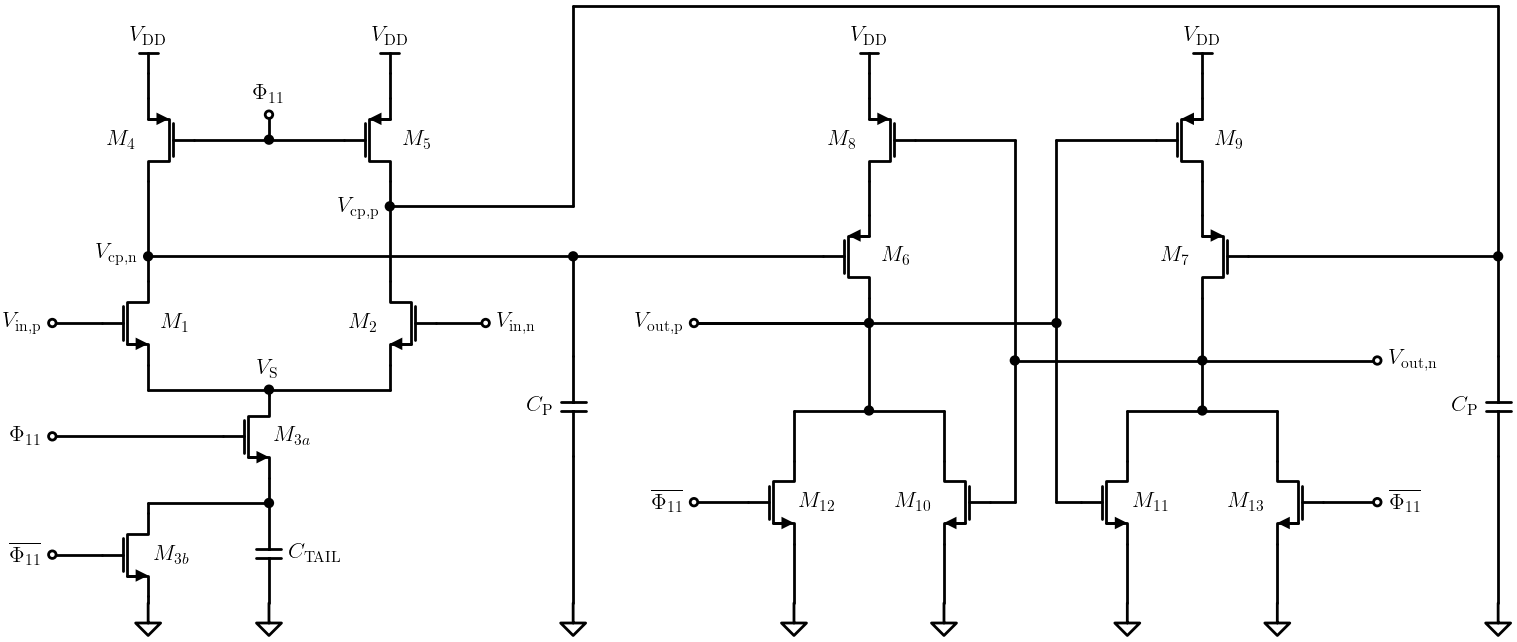

In [145]:
# Draw Dynamic-biasing DT comparator without W/L
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=16)
    
    # Pre-Amplifier
    # M1 / M4
    elm.Dot(open=True).label('$V_\mathrm{in,p}$', loc='left', ofst=0.15)
    startDot = d.here
    elm.Line().right().length(1)
    M1 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label('$M_1$', ofst=-1.75).reverse()
    elm.Line().at(M1.drain).up().length(0.5).dot().label('$V_\mathrm{cp,n}$', loc='top', ofst=(0.25, 0.15))
    VcpnDot = d.here
    elm.Line().up().length(1.5)
    M4 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label('$M_4$', ofst=0.25)
    elm.Line().at(M4.source).up().length(0.5)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M4.gate).right().length(1.5).dot()
    d.push()
    elm.Line().up().length(0.5)
    elm.Dot(open=True).label('$\Phi_{11}$', loc='top', ofst=0.15)
    clkDot = d.here
    d.pop()

    # M2 / M5
    elm.Line().right().length(1.5)
    M5 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label('$M_5$', ofst=-1.75).reverse()
    elm.Line().at(M5.source).up().length(0.5)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    vddDot = d.here
    elm.Line().at(M5.drain).down().length(0.5).dot().label('$V_\mathrm{cp,p}$', loc='top', ofst=(0.25, -0.15))
    VcppDot = d.here
    elm.Line().down().length(1.5)
    M2 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label('$M_2$', ofst=0.25)
    elm.Line().at(M2.gate).right().length(1)
    elm.Dot(open=True).label('$V_\mathrm{in,n}$', loc='right', ofst=0.15)

    # VS
    elm.Line().at(M1.source).down().length(0.5)
    elm.Line().right().tox(clkDot).dot().label('$V_\mathrm{S}$', loc='top', ofst=(1.15, 0.15))
    elm.Line().at(M2.source).down().length(0.5)
    elm.Line().left().tox(clkDot)

    # M3a / M3b
    elm.Line().down().length(0.1)
    M3a = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label('$M_{3a}$', ofst=-1.75).reverse()
    elm.Line().at(M3a.gate).left().tox(startDot)
    elm.Dot(open=True).label('$\Phi_{11}$', loc='left', ofst=0.15)
    elm.Line().at(M3a.source).down().length(0.5).dot()
    d.push()
    Cpn = elm.Capacitor().label('$C_\mathrm{TAIL}$', loc='bottom', ofst=0.15)
    gndDot = d.here
    elm.GroundSignal()
    d.pop()
    elm.Line().left().tox(M1.source)
    elm.Line().down().length(0.2)
    M3b = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label('$M_{3b}$', ofst=-1.75).reverse()
    elm.Line().at(M3b.gate).left().tox(startDot)
    elm.Dot(open=True).label('$\overline{\Phi_{11}}$', loc='left', ofst=0.15)
    elm.Line().at(M3b.source).down().toy(gndDot)
    elm.GroundSignal()
    
    # Latch stage
    # Cpn
    elm.Line().at(VcpnDot).right().length(8.5).dot()
    CpnDot = d.here
    d.push()
    elm.Line().down().length(2)
    # elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    Cpn = elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15)
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # M6
    d.pop()
    elm.Line().right().length(5)
    M6 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label('$M_6$', ofst=-1.75).reverse()
    elm.Line().at(M6.drain).down().length(0.5).dot()

    # Voutp
    d.push()
    elm.Line().left().length(3.5)
    elm.Dot(open=True).label('$V_\mathrm{out,p}$', loc='left', ofst=0.15)
    voutpDot = d.here
    d.pop()

    # M10 / M12
    elm.Line().down().length(1.75).dot()
    d.push()
    elm.Line().left().length(1.5)
    elm.Line().down().length(1.0)
    M12 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label('$M_{12}$', ofst=-1.75).reverse()
    elm.Line().at(M12.gate).left().tox(voutpDot)
    elm.Dot(open=True).label('$\overline{\Phi_{11}}$', loc='left', ofst=0.15)
    elm.Line().at(M12.source).down().toy(gndDot)
    elm.GroundSignal()
    d.pop()
    elm.Line().right().length(1.5)
    elm.Line().down().length(1.0)
    M10 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label('$M_{10}$', ofst=0.25)
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # M8
    elm.Line().at(M6.source).up().toy(M5.drain)
    M8 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label('$M_8$', ofst=0.25)
    elm.Line().at(M8.source).up().toy(vddDot)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M8.gate).right().length(2)
    elm.Line().down().toy(M10.gate)
    xofM8M10con = d.here
    elm.Line().left().tox(M10.gate)

    # M11 / M13
    elm.Line().at(voutpDot).right().length(7.25).dot()
    d.push()
    elm.Line().down().toy(M10.gate)
    elm.Line().right().length(0.5)
    M11 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label('$M_{11}$', ofst=-1.75).reverse()
    elm.Line().at(M11.source).down().toy(gndDot)
    elm.GroundSignal()
    elm.Line().at(M11.drain).up().length(1.0)
    elm.Line().right().length(1.5).dot()
    d.push()
    elm.Line().right().length(1.5)
    elm.Line().down().length(1.0)
    M13 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label('$M_{13}$', ofst=0.25)
    elm.Line().at(M13.source).down().toy(gndDot)
    elm.GroundSignal()
    d.pop()
    elm.Line().up().length(1).dot()
    d.push()
    elm.Line().right().length(3.5)
    elm.Dot(open=True).label('$V_\mathrm{out,n}$', loc='right', ofst=0.15)
    voutnDot = d.here
    elm.Line().at(M13.gate).right().tox(voutnDot)
    elm.Dot(open=True).label('$\overline{\Phi_{11}}$', loc='right', ofst=0.15)
    d.pop()
    d.push()
    elm.Line().left().tox(xofM8M10con).dot()

    # M7
    d.pop()
    elm.Line().up().toy(M6.drain)
    M7 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label('$M_7$', ofst=0.25)
    elm.Line().at(M7.source).up().toy(M8.drain)

    # M9
    M9 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label('$M_9$', ofst=-1.75).reverse()
    elm.Line().at(M9.source).up().toy(vddDot)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M9.gate).left().length(2)
    elm.Line().down().toy(voutpDot)

    # Cpn
    elm.Line().at(M7.gate).right().length(5).dot()
    d.push()
    elm.Line().down().length(2)
    # elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    Cpp = elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15)
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # Connection back to Vcpp
    d.pop()
    elm.Line().up().length(5)
    elm.Line().left().tox(CpnDot)
    elm.Line().down().toy(VcppDot)
    elm.Line().left().tox(VcppDot)

    # Save the schematic
    d.save('figures/comparator/discrete_time/DT_comparator_dynamic_biasing_circuit.svg')
    d.save('figures/comparator/discrete_time/DT_comparator_dynamic_biasing_circuit.pdf')

Sizing

In [146]:
# Dynamic-biasing DT comparator Sizing

# If the Elzakker DT Comparator is designed once, the sizing of the dynamic-biasing DT comparator is straight forward.

# For clock = 1 and t = 0, Ctail acts as short circuit and therefore the sizing of M1, M2 and M3a=M3 can be done as shown with the Elzakker DT comparator.
# In fact, the Elzakker DT Comparator can be copied and only M3b and Ctail has to be added and designed.
w_m3a = w_m3

# M3b acts as a switch and discharges Ctail during the OFF time of the clock. 
# As explained above for M4 and M5 sizing, the OFF time is much longer than the ON time and therefore the sizing is not critical.
# To fit the layout best, the length is chosen to be 0.13um and the width is set to 1um.
w_m3b = 1.0

# The interesting part is the design of Ctail:
# If Ctail is increased, the charge time of Ctail increases and therefore the voltage Vs is increased slower. 
# Consequently, M1 & M2 are pinched-off later and therefore the diff. pair output voltage decreases longer (v_cp_min decreases).
# Therefore, the output latch switches faster resulting into less propagation delay.
# However, if v_cp decreases further, more power is needed but in any case less than an Elzakker comparator would consume.

# Therefore, Ctail should be as small as possible in order to save power and area.
# However, if Ctail is too small, v_cp_min might not be small enough resulting in a really long propagation delay or 
# in the worst-case the DT comparator does not even switch the outputs within the on-time of the clock.

# In the following, Ctail is analyzed in terms of v_cp_min, propagation delay and energy per conversion.

Total input-referred noise

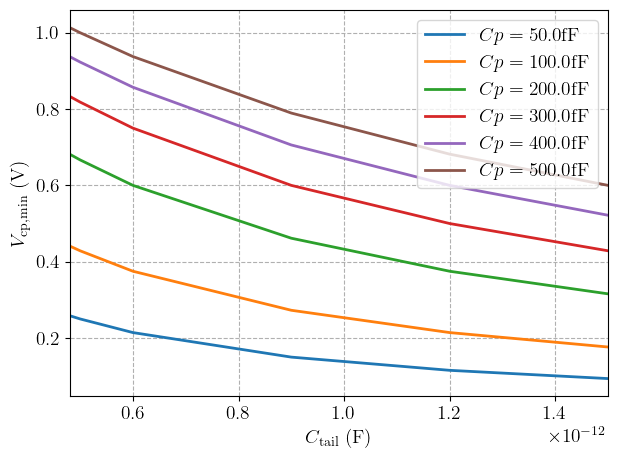

In [147]:
# Plot v_cp_min against Ctail for Cp = 300fF
# From Bindra's paper "A 1.2V Dynamic Bias Latch-Type Comparator in 65nm CMOS with 0.4mV Input Noise" (8):
# delta_v_cp_max = Ctail / (Ctail + 2 * Cp) * VDD

CP_vec = np.array([50e-15, 100e-15, 200e-15, 300e-15, 400e-15, 500e-15])
Ctail_vec = np.array([480e-15, 500e-15, 600e-15, 900e-15, 1200e-15, 1500e-15])

delta_v_cp_max = np.empty((len(CP_vec), len(Ctail_vec)))
v_cp_min = np.empty((len(CP_vec), len(Ctail_vec)))
for i in range(len(CP_vec)):
  delta_v_cp_max[i] = Ctail_vec / (Ctail_vec + 2 * CP_vec[i]) * VDD
  v_cp_min[i] = VDD - delta_v_cp_max[i]

fig4 = plt.figure(tight_layout = True)
for i in range(len(CP_vec)):
  plt.plot(Ctail_vec, v_cp_min[i], linewidth = 2, label = f"$Cp = {round(float(CP_vec[i]) * 1e15, 2)}$fF")
plt.xlabel('$C_\mathrm{tail}$ (F)')
plt.ylabel('$V_\mathrm{cp,min}$ (V)')
plt.grid(visible = True, linestyle='--')
plt.xlim((480e-15, 1500e-15))
plt.legend()
plt.show()
fig4.savefig("figures/comparator/discrete_time/v_cp_min_against_Ctail.svg", bbox_inches='tight')
fig4.savefig("figures/comparator/discrete_time/v_cp_min_against_Ctail.pdf", bbox_inches='tight')
np.savetxt("figures/comparator/discrete_time/v_cp_min_against_Ctail.csv", 
           np.column_stack((Ctail_vec, v_cp_min[0], v_cp_min[1], v_cp_min[2], v_cp_min[3], v_cp_min[4], v_cp_min[5])), 
           comments = "", header = "Ctail_vec,v_cp_min_0,v_cp_min_1,v_cp_min_2,v_cp_min_3,v_cp_min_4,v_cp_min_5", delimiter = ",")


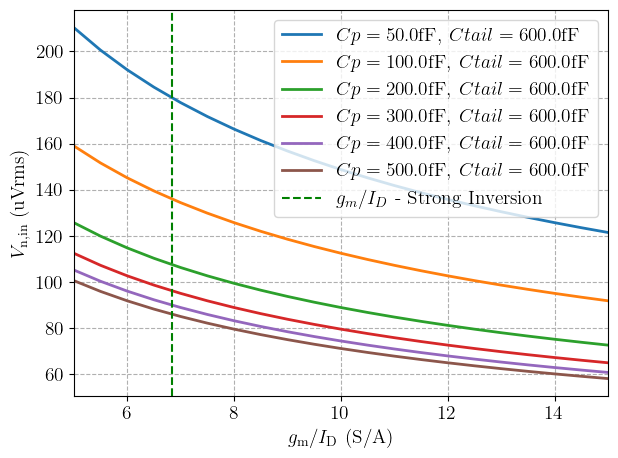

The total input-referred noise for gm/ID = 6.84S/V, Cp = 50.0fF and Ctail = 600.0fF equals 179.83uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 100.0fF and Ctail = 600.0fF equals 135.94uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 200.0fF and Ctail = 600.0fF equals 107.47uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 600.0fF equals 96.12uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 400.0fF and Ctail = 600.0fF equals 89.92uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 500.0fF and Ctail = 600.0fF equals 85.98uVrms.


In [148]:
# Plot total (integrated) input-referred noise for several Cp against gm/ID for Ctail = 600fF in strong inversion (5S/A to 15S/A)
# Ngspice does not support transient noise analysis right now.
# Luckily, there is an estimation formula for total (integrated) input-referred noise of DT comparators with diff. pair input.
# From Bindra's paper "A 1.2V Dynamic Bias Latch-Type Comparator in 65nm CMOS with 0.4mV Input Noise" (12) for strong inversion:
# Vn_in_rms(Tint) = sqrt((4 * k * T * gamma) / (Cp * delta_v_cp(Tint) * gm / ID(Tint)))
# Before, delta_v_cp_max was calculated, therefore Vn_in_rms_min can be calculated here. The progress against Tint is not analyzed here and can be found in [Bindra].
# According to [Bindra] Fig. 6 this should be in the same order of magnitude as for Elzakker's comparator.

T = 300 # in Kelvin
CP_vec = np.array([50e-15, 100e-15, 200e-15, 300e-15, 400e-15, 500e-15])
Ctail_vec = np.array([480e-15, 500e-15, 600e-15, 900e-15, 1200e-15, 1500e-15])

# Calculate input noise for a specific range of gm_id
gm_id_vec = np.arange(5, 15 + 0.5, 0.5)  # 5S/A to 15S/A, 0.5S/A steps
Vn_in_rms = np.empty((len(CP_vec), len(gm_id_vec)))
for i in range(len(CP_vec)):
  Vn_in_rms[i] = np.sqrt((4 * sc.k * T * gamma_m12_si) / (CP_vec[i] * delta_v_cp_max[i][2] * gm_id_vec))

fig5 = plt.figure(tight_layout = True)
for i in range(len(CP_vec)):
  plt.plot(gm_id_vec, Vn_in_rms[i] * 1e6, linewidth = 2, label = f"$Cp = {round(float(CP_vec[i]) * 1e15, 2)}$fF, $Ctail = {round(float(Ctail_vec[2]) * 1e15, 2)}$fF")
plt.axvline(gm_id_m12_si, color='g', linestyle='--', label=r'$g_{m} / I_{D}$ - Strong Inversion')
plt.xlabel('$g_\mathrm{m} / I_\mathrm{D}$ (S/A)')
plt.ylabel('$V_\mathrm{n,in}$ (uVrms)')
plt.grid(visible = True, linestyle='--')
plt.xlim((5, 15))
plt.legend()
plt.show()
fig5.savefig("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Cp_dynamic_si.svg", bbox_inches='tight')
fig5.savefig("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Cp_dynamic_si.pdf", bbox_inches='tight')
np.savetxt("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Cp_dynamic_si.csv", 
           np.column_stack((gm_id_vec, Vn_in_rms[0] * 1e6, Vn_in_rms[1] * 1e6, Vn_in_rms[2] * 1e6, Vn_in_rms[3] * 1e6, Vn_in_rms[4] * 1e6, Vn_in_rms[5] * 1e6)), 
           comments = "", header = "gm_id_vec,Vn_in_rms_0,Vn_in_rms_1,Vn_in_rms_2,Vn_in_rms_3,Vn_in_rms_4,Vn_in_rms_5", delimiter = ",")

for i in range(len(CP_vec)):
  print(f"The total input-referred noise for gm/ID = {round(float(gm_id_m12_si), 2)}S/V, Cp = {round(float(CP_vec[i]) * 1e15, 2)}fF and Ctail = {round(float(Ctail_vec[2]) * 1e15, 2)}fF equals {round(np.sqrt((4 * sc.k * T * gamma_m12_si) / (CP_vec[i] * delta_v_cp_max[i][2] * gm_id_m12_si)) * 1e6, 2)}uVrms.")

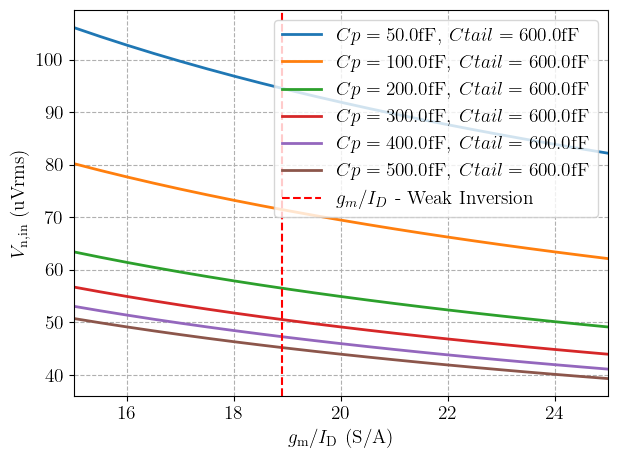

The total input-referred noise for gm/ID = 18.91S/V, Cp = 50.0fF and Ctail = 600.0fF equals 94.49uVrms.
The total input-referred noise for gm/ID = 18.91S/V, Cp = 100.0fF and Ctail = 600.0fF equals 71.43uVrms.
The total input-referred noise for gm/ID = 18.91S/V, Cp = 200.0fF and Ctail = 600.0fF equals 56.47uVrms.
The total input-referred noise for gm/ID = 18.91S/V, Cp = 300.0fF and Ctail = 600.0fF equals 50.51uVrms.
The total input-referred noise for gm/ID = 18.91S/V, Cp = 400.0fF and Ctail = 600.0fF equals 47.25uVrms.
The total input-referred noise for gm/ID = 18.91S/V, Cp = 500.0fF and Ctail = 600.0fF equals 45.18uVrms.


In [149]:
# Plot total (integrated) input-referred noise for several Cp against gm/ID for Ctail = 600fF in weak inversion (15S/A to 25S/A)
# Ngspice does not support transient noise analysis right now.
# Luckily, there is an estimation formula for total (integrated) input-referred noise of DT comparators with diff. pair input.
# From Bindra's paper "A 1.2V Dynamic Bias Latch-Type Comparator in 65nm CMOS with 0.4mV Input Noise" (15) for weak inversion:
# Vn_in_rms(Tint) = sqrt((2 * n * k * T) / (Cp * delta_v_cp(Tint) * gm / ID(Tint)))
# Before, delta_v_cp_max was calculated, therefore Vn_in_rms_min can be calculated here. The progress against Tint is not analyzed here and can be found in [Bindra].
# According to [Bindra] Fig. 6 this should be in the same order of magnitude as for Elzakker's comparator.

T = 300 # in Kelvin
CP_vec = np.array([50e-15, 100e-15, 200e-15, 300e-15, 400e-15, 500e-15])
Ctail_vec = np.array([480e-15, 500e-15, 600e-15, 900e-15, 1200e-15, 1500e-15])

# Calculate input noise for a specific range of gm_id
n = 1.31 # typical for 130nm CMOS process
gm_id_vec = np.arange(15, 25 + 0.5, 0.5)  # 15S/A to 25S/A, 0.5S/A steps
Vn_in_rms = np.empty((len(CP_vec), len(gm_id_vec)))
for i in range(len(CP_vec)):
  Vn_in_rms[i] = np.sqrt((2 * n * sc.k * T) / (CP_vec[i] * delta_v_cp_max[i][2] * gm_id_vec))

fig6 = plt.figure(tight_layout = True)
for i in range(len(CP_vec)):
  plt.plot(gm_id_vec, Vn_in_rms[i] * 1e6, linewidth = 2, label = f"$Cp = {round(float(CP_vec[i]) * 1e15, 2)}$fF, $Ctail = {round(float(Ctail_vec[2]) * 1e15, 2)}$fF")
plt.axvline(gm_id_m12_wi, color='r', linestyle='--', label=r'$g_{m} / I_{D}$ - Weak Inversion')
plt.xlabel('$g_\mathrm{m} / I_\mathrm{D}$ (S/A)')
plt.ylabel('$V_\mathrm{n,in}$ (uVrms)')
plt.grid(visible = True, linestyle='--')
plt.xlim((15, 25))
plt.legend()
plt.show()
fig6.savefig("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Cp_dynamic_wi.svg", bbox_inches='tight')
fig6.savefig("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Cp_dynamic_wi.pdf", bbox_inches='tight')
np.savetxt("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Cp_dynamic_wi.csv", 
           np.column_stack((gm_id_vec, Vn_in_rms[0] * 1e6, Vn_in_rms[1] * 1e6, Vn_in_rms[2] * 1e6, Vn_in_rms[3] * 1e6, Vn_in_rms[4] * 1e6, Vn_in_rms[5] * 1e6)), 
           comments = "", header = "gm_id_vec,Vn_in_rms_0,Vn_in_rms_1,Vn_in_rms_2,Vn_in_rms_3,Vn_in_rms_4,Vn_in_rms_5", delimiter = ",")

for i in range(len(CP_vec)):
  print(f"The total input-referred noise for gm/ID = {round(float(gm_id_m12_wi), 2)}S/V, Cp = {round(float(CP_vec[i]) * 1e15, 2)}fF and Ctail = {round(float(Ctail_vec[2]) * 1e15, 2)}fF equals {round(np.sqrt((2 * n * sc.k * T) / (CP_vec[i] * delta_v_cp_max[i][2] * gm_id_m12_wi)) * 1e6, 2)}uVrms.")


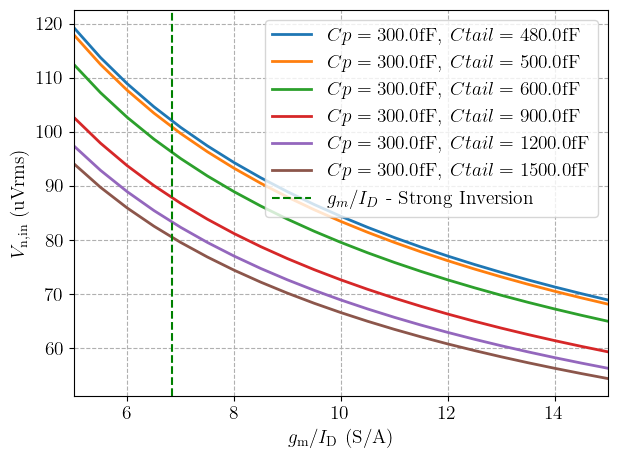

The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 480.0fF equals 101.96uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 500.0fF equals 100.82uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 600.0fF equals 96.12uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 900.0fF equals 87.75uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 1200.0fF equals 83.25uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 1500.0fF equals 80.42uVrms.


In [150]:
# Plot total (integrated) input-referred noise for several Ctail against gm/ID for Cp = 300fF in strong inversion (5S/A to 15S/A)
# Ngspice does not support transient noise analysis right now.
# Luckily, there is an estimation formula for total (integrated) input-referred noise of DT comparators with diff. pair input.
# From Bindra's paper "A 1.2V Dynamic Bias Latch-Type Comparator in 65nm CMOS with 0.4mV Input Noise" (12) for strong inversion:
# Vn_in_rms(Tint) = sqrt((4 * k * T * gamma) / (Cp * delta_v_cp(Tint) * gm / ID(Tint)))
# Before, delta_v_cp_max was calculated, therefore Vn_in_rms_min can be calculated here. The progress against Tint is not analyzed here and can be found in [Bindra].
# According to [Bindra] Fig. 6 this should be in the same order of magnitude as for Elzakker's comparator.

T = 300 # in Kelvin
CP_vec = np.array([50e-15, 100e-15, 200e-15, 300e-15, 400e-15, 500e-15])
Ctail_vec = np.array([480e-15, 500e-15, 600e-15, 900e-15, 1200e-15, 1500e-15])

# Calculate input noise for a specific range of gm_id
gm_id_vec = np.arange(5, 15 + 0.5, 0.5)  # 5S/A to 15S/A, 0.5S/A steps
Vn_in_rms = np.empty((len(Ctail_vec), len(gm_id_vec)))
for i in range(len(Ctail_vec)):
  Vn_in_rms[i] = np.sqrt((4 * sc.k * T * gamma_m12_si) / (Cp * delta_v_cp_max[3][i] * gm_id_vec))

fig7 = plt.figure(tight_layout = True)
for i in range(len(Ctail_vec)):
  plt.plot(gm_id_vec, Vn_in_rms[i] * 1e6, linewidth = 2, label = f"$Cp = {round(float(Cp) * 1e15, 2)}$fF, $Ctail = {round(float(Ctail_vec[i]) * 1e15, 2)}$fF")
plt.axvline(gm_id_m12_si, color='g', linestyle='--', label=r'$g_{m} / I_{D}$ - Strong Inversion')
plt.xlabel('$g_\mathrm{m} / I_\mathrm{D}$ (S/A)')
plt.ylabel('$V_\mathrm{n,in}$ (uVrms)')
plt.grid(visible = True, linestyle='--')
plt.xlim((5, 15))
plt.legend()
plt.show()
fig7.savefig("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Ctail_dynamic_si.svg", bbox_inches='tight')
fig7.savefig("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Ctail_dynamic_si.pdf", bbox_inches='tight')
np.savetxt("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Ctail_dynamic_si.csv", 
           np.column_stack((gm_id_vec, Vn_in_rms[0] * 1e6, Vn_in_rms[1] * 1e6, Vn_in_rms[2] * 1e6, Vn_in_rms[3] * 1e6, Vn_in_rms[4] * 1e6, Vn_in_rms[5] * 1e6)), 
           comments = "", header = "gm_id_vec,Vn_in_rms_0,Vn_in_rms_1,Vn_in_rms_2,Vn_in_rms_3,Vn_in_rms_4,Vn_in_rms_5", delimiter = ",")

for i in range(len(Ctail_vec)):
  print(f"The total input-referred noise for gm/ID = {round(float(gm_id_m12_si), 2)}S/V, Cp = {round(float(Cp) * 1e15, 2)}fF and Ctail = {round(float(Ctail_vec[i]) * 1e15, 2)}fF equals {round(np.sqrt((4 * sc.k * T * gamma_m12_si) / (Cp * delta_v_cp_max[3][i] * gm_id_m12_si)) * 1e6, 2)}uVrms.")

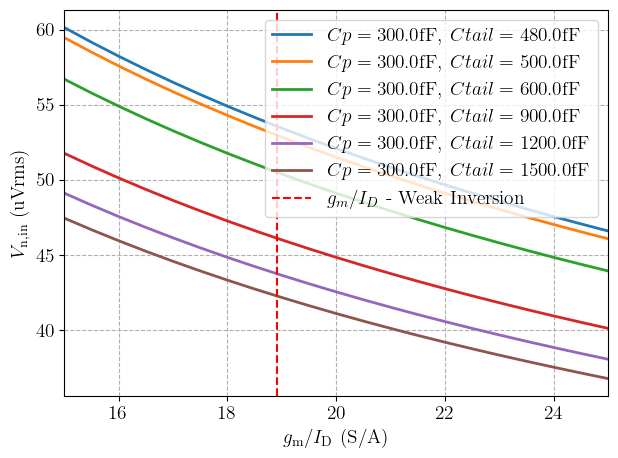

The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 480.0fF equals 53.57uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 500.0fF equals 52.97uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 600.0fF equals 50.51uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 900.0fF equals 46.11uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 1200.0fF equals 43.74uVrms.
The total input-referred noise for gm/ID = 6.84S/V, Cp = 300.0fF and Ctail = 1500.0fF equals 42.26uVrms.


In [151]:
# Plot total (integrated) input-referred noise for several Ctail against gm/ID for Cp = 300fF in weak inversion (15S/A to 25S/A)
# Ngspice does not support transient noise analysis right now.
# Luckily, there is an estimation formula for total (integrated) input-referred noise of DT comparators with diff. pair input.
# From Bindra's paper "A 1.2V Dynamic Bias Latch-Type Comparator in 65nm CMOS with 0.4mV Input Noise" (15) for weak inversion:
# Vn_in_rms(Tint) = sqrt((2 * n * k * T) / (Cp * delta_v_cp(Tint) * gm / ID(Tint)))
# Before, delta_v_cp_max was calculated, therefore Vn_in_rms_min can be calculated here. The progress against Tint is not analyzed here and can be found in [Bindra].
# According to [Bindra] Fig. 6 this should be in the same order of magnitude as for Elzakker's comparator.

T = 300 # in Kelvin
CP_vec = np.array([50e-15, 100e-15, 200e-15, 300e-15, 400e-15, 500e-15])
Ctail_vec = np.array([480e-15, 500e-15, 600e-15, 900e-15, 1200e-15, 1500e-15])

# Calculate input noise for a specific range of gm_id
gm_id_vec = np.arange(15, 25 + 0.5, 0.5)  # 15S/A to 25S/A, 0.5S/A steps
Vn_in_rms = np.empty((len(Ctail_vec), len(gm_id_vec)))
for i in range(len(Ctail_vec)):
  Vn_in_rms[i] = np.sqrt((2 * n * sc.k * T) / (Cp * delta_v_cp_max[3][i] * gm_id_vec))

fig8 = plt.figure(tight_layout = True)
for i in range(len(Ctail_vec)):
  plt.plot(gm_id_vec, Vn_in_rms[i] * 1e6, linewidth = 2, label = f"$Cp = {round(float(Cp) * 1e15, 2)}$fF, $Ctail = {round(float(Ctail_vec[i]) * 1e15, 2)}$fF")
plt.axvline(gm_id_m12_wi, color='r', linestyle='--', label=r'$g_{m} / I_{D}$ - Weak Inversion')
plt.xlabel('$g_\mathrm{m} / I_\mathrm{D}$ (S/A)')
plt.ylabel('$V_\mathrm{n,in}$ (uVrms)')
plt.grid(visible = True, linestyle='--')
plt.xlim((15, 25))
plt.legend()
plt.show()
fig8.savefig("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Ctail_dynamic_wi.svg", bbox_inches='tight')
fig8.savefig("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Ctail_dynamic_wi.pdf", bbox_inches='tight')
np.savetxt("figures/comparator/discrete_time/Vn_in_rms_against_gm_id_Ctail_dynamic_wi.csv", 
           np.column_stack((gm_id_vec, Vn_in_rms[0] * 1e6, Vn_in_rms[1] * 1e6, Vn_in_rms[2] * 1e6, Vn_in_rms[3] * 1e6, Vn_in_rms[4] * 1e6, Vn_in_rms[5] * 1e6)), 
           comments = "", header = "gm_id_vec,Vn_in_rms_0,Vn_in_rms_1,Vn_in_rms_2,Vn_in_rms_3,Vn_in_rms_4,Vn_in_rms_5", delimiter = ",")

for i in range(len(Ctail_vec)):
  print(f"The total input-referred noise for gm/ID = {round(float(gm_id_m12_si), 2)}S/V, Cp = {round(float(Cp) * 1e15, 2)}fF and Ctail = {round(float(Ctail_vec[i]) * 1e15, 2)}fF equals {round(np.sqrt((2 * n * sc.k * T) / (Cp * delta_v_cp_max[3][i] * gm_id_m12_wi)) * 1e6, 2)}uVrms.")

In [152]:
# Conclusion:
# As already shown with the Elzakker comparator, the input-referred noise decreases if Cp is increased (with a constant Ctail).
# Interestingly, the input-referred noise also decreases if Ctail is increased (with a constant Cp).
# In weak inversion, the input-referred noise is smaller. This is also already shown with the Elzakker comparator.
# With Cp = 300fF and Ctail = 600fF, the input-referred noise in strong inversion results into 96.12uVrms. This result fits the noise budget perfectly.

Propagation delay

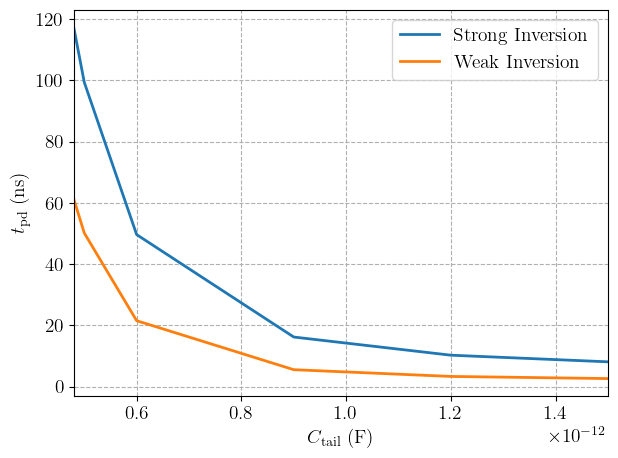

In [153]:
# Simulate and plot propagation delay against Ctail for Cp = 300fF
# Settings: VDD = 1.5V, T = 27°C, TT corner, Vcm = 0.75V, dVin = 10mV (approx. 1LSB at 7-Bit fully-differential), strong inversion and weak inversion input stage, Cload = 10fF

Ctail_vec = np.array([480e-15, 500e-15, 600e-15, 900e-15, 1200e-15, 1500e-15])

# Strong Inversion: M1, M2 = 1u
tpd_si = [117.22, 99.35, 49.64, 16.21, 10.28, 8.12] # in ns (exponential relation)

# Weak Inversion: M1, M2 = 60u
tpd_wi = [61.23, 50.16, 21.54, 5.55, 3.35, 2.65] # in ns (exponential relation)

fig9 = plt.figure(tight_layout = True)
plt.plot(Ctail_vec, tpd_si, linewidth = 2, label = "Strong Inversion")
plt.plot(Ctail_vec, tpd_wi, linewidth = 2, label = "Weak Inversion")
plt.xlabel('$C_\mathrm{tail}$ (F)')
plt.ylabel('$t_\mathrm{pd}$ (ns)')
plt.grid(visible = True, linestyle='--')
plt.xlim((480e-15, 1500e-15))
plt.legend()
plt.show()
fig9.savefig("figures/comparator/discrete_time/tpd_against_Ctail.svg", bbox_inches='tight')
fig9.savefig("figures/comparator/discrete_time/tpd_against_Ctail.pdf", bbox_inches='tight')
np.savetxt("figures/comparator/discrete_time/tpd_against_Ctail.csv", 
           np.column_stack((Ctail_vec, tpd_si, tpd_wi)),
           comments = "", header = "Ctail_vec,tpd_si,tpd_wi", delimiter = ",")

# Conclusion: 
# The higher the capacitor Ctail, the smaller the propagation delay.
# This seems right because if Ctail is large, Vcp,min is small and therefore the output latch is faster.
# If the input diff. pair is in strong inversion, the propagation delay is much higher compared to weak inversion.
# However, this difference reduces with increasing Ctail.
# Anyway, both operating points result into a exponential decrease relation between propagation delay and capacitor Ctail.

Energy per Conversion

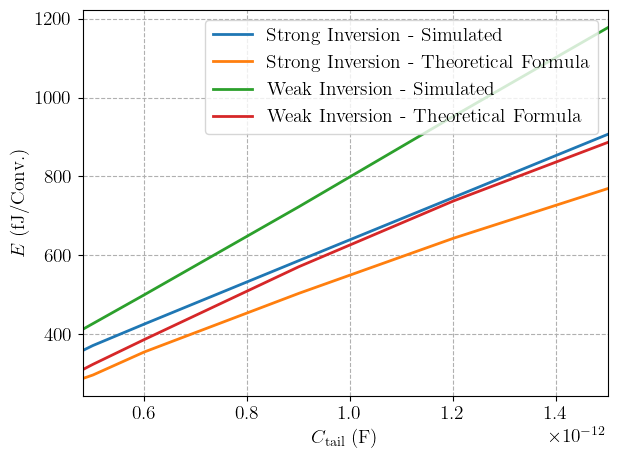

In [154]:
# Simulate and plot fJ/conv. against Ctail for Cp = 300fF
# Settings: VDD = 1.5V, T = 27°C, TT corner, Vcm = 0.75V, dVin = 10mV (approx. 1LSB at 7-Bit fully-differential), strong inversion and weak inversion input stage, Cload = 10fF

Ctail_vec = np.array([480e-15, 500e-15, 600e-15, 900e-15, 1200e-15, 1500e-15])

# Strong Inversion: M1, M2 = 1u
epc_si = [358.90, 371.72, 426.18, 586.88, 746.89, 906.98] # in fJ/Conv. (linear relation)
vcpp_min_si = [1.20, 1.19, 1.13, 0.97, 0.82, 0.68]
vcpn_min_si = [1.16, 1.15, 1.08, 0.91, 0.75, 0.61]

# Theoretical formula
epc_formula_si = np.empty(len(vcpp_min_si))
for i in range(len(vcpp_min_si)):
  epc_formula_si[i] = (2 * Cp * VDD**2 - Cp * VDD * (vcpp_min_si[i] + vcpn_min_si[i])) * 1e15

# Weak Inversion: M1, M2 = 60u
epc_wi = [412.56, 427.20, 500.40, 723.45, 952.54, 1177.25] # in fJ/Conv. (linear relation)
vcpp_min_wi = [1.19, 1.18, 1.11, 0.92, 0.73, 0.56]
vcpn_min_wi = [1.12, 1.10, 1.03, 0.81, 0.63, 0.47]

# Theoretical formula
epc_formula_wi = np.empty(len(vcpp_min_wi))
for i in range(len(vcpp_min_wi)):
  epc_formula_wi[i] = (2 * Cp * VDD**2 - Cp * VDD * (vcpp_min_wi[i] + vcpn_min_wi[i])) * 1e15

fig10 = plt.figure(tight_layout = True)
plt.plot(Ctail_vec, epc_si, linewidth = 2, label = "Strong Inversion - Simulated")
plt.plot(Ctail_vec, epc_formula_si, linewidth = 2, label = "Strong Inversion - Theoretical Formula")
plt.plot(Ctail_vec, epc_wi, linewidth = 2, label = "Weak Inversion - Simulated")
plt.plot(Ctail_vec, epc_formula_wi, linewidth = 2, label = "Weak Inversion - Theoretical Formula")
plt.xlabel('$C_\mathrm{tail}$ (F)')
plt.ylabel('$E$ (fJ/Conv.)')
plt.grid(visible = True, linestyle='--')
plt.xlim((480e-15, 1500e-15))
plt.legend()
plt.show()
fig10.savefig("figures/comparator/discrete_time/epc_against_Ctail.svg", bbox_inches='tight')
fig10.savefig("figures/comparator/discrete_time/epc_against_Ctail.pdf", bbox_inches='tight')
np.savetxt("figures/comparator/discrete_time/epc_against_Ctail.csv",
           np.column_stack((Ctail_vec, epc_si, epc_formula_si, epc_wi, epc_formula_wi)),
           comments = "", header = "Ctail_vec,epc_si,epc_formula_si,epc_wi,epc_formula_wi", delimiter = ",")

# Conclusion:
# As expected, the higher the capacitor Ctail, the higher the energy per conversion.
# The theoretical formula yields the bottom line of energy per conversion.
# In general, if the diff. pair operates in strong inversion, the DT comparator needs less energy per conversion.
# Strong and weak inversion have a linear relation of energy per conversion to capacitor Ctail.

Summary and final values

In [155]:
# Final selection of Ctail

# After analyzing the most important trade-offs of the size of Ctail, Ctail is chosen to be 600fF.
# 500fF would be also ok but to have some room on the propagation delay over all corners, 600fF seems to be just fine.
# Also the input-referred noise would increase with smaller Ctail.
# Furthermore, 600fF can be utilized out of two Cp = 300fF which might be better for matching in the layout.
Ctail = Ctail_vec[2]

# Calculate total (integrated) input-referred noise for CP
Vn_in_rms_final = np.sqrt((4 * sc.k * T * gamma_m12_si) / (Cp * delta_v_cp_max[3][2] * gm_id_m12_si))

# Get propagation delay (simulated)
tpd = tpd_si[2]

# Get energy per conversion (simulated)
epc = epc_si[2]

# Get input dc offset (simulated)
Voffs_in = 1.55e-3

# Get average input capacitance (simulated)
Cinp = 1.25e-15
Cinn = 1.38e-15

# Elzakker vs. Dynamic-Biasing DT Comparator
# The input-referred noise decreased from Vn_in_rms = 127.05 uVrms to Vn_in_rms = 96.12 uVrms (calculated) --> * 3 / 4 
# The propagation delay increased from tpd = 3.95 ns (simulated) to tpd = 49.64 ns (simulated) --> * 12.5.
# The energy per conversion decreased from epc = 1829.68 fJ/conv (simulated) to epc = 426.18 fJ/conv (simulated) --> / 4.3.
# The input dc offset decreased from Voffs_in = 5.02 mV (simulated) to Voffs_in = 1.55 mV (simulated) --> / 3.2.
# The average input capacitance decreased from Cinp = 1.90 fF / Cinn = 1.42 fF (simulated) to Cinp = 1.25 fF / Cinn = 1.38 fF (simulated).

In [156]:
# print out final design values
print('Dynamic-biasing DT comparator W/L ratios:')
print('------------------------------------')
print('Differential Input Stage')
print('NMOS M1: W =', w_m12,'um, L =', l,'um')
print('NMOS M2: W =', w_m12,'um, L =', l,'um')
print('NMOS M3a: W =', w_m3a,'um, L =', l,'um')
print('NMOS M3b: W =', w_m3b,'um, L =', l,'um')
print('PMOS M4: W =', w_m45,'um, L =', l,'um')
print('PMOS M5: W =', w_m45,'um, L =', l,'um')
print('Capacitor Cp =', round(float(Cp * 1e15), 2),'fF')
print('Capacitor Ctail =', round(float(Ctail * 1e15), 2),'fF')
print('------------------------------------')
print('Output Latch')
print('PMOS M6: W =', w_m67,'um, L =', l,'um')
print('PMOS M7: W =', w_m67,'um, L =', l,'um')
print('PMOS M8: W =', w_m89,'um, L =', l,'um')
print('PMOS M9: W =', w_m89,'um, L =', l,'um')
print('NMOS M10: W =', w_m1011,'um, L =', l,'um')
print('NMOS M11: W =', w_m1011,'um, L =', l,'um')
print('NMOS M12: W =', w_m1213,'um, L =', l,'um')
print('NMOS M13: W =', w_m1213,'um, L =', l,'um')
print('------------------------------------')
print('Design Results')
print('Max. input capacitance: Cin =', round(float(cgg_m12) * 1e15, 2), 'fF (gm/ID)')
print('Average positive input capacitance from 1Hz to 1GHz: Cinp =', round(Cinp * 1e15, 2), 'fF (simulated)')
print('Average negative input capacitance from 1Hz to 1GHz: Cinn =', round(Cinn * 1e15, 2), 'fF (simulated)')
print('Max. total (integrated) input-referred noise: Vn_in_rms =', round(float(Vn_in_rms_final) * 1e6, 2), 'uVrms (gm/ID + formula)')
print('Propagation delay: tpd =', round(float(tpd), 2), 'ns (simulated)')
print('Energy per conversion: epc =', round(float(epc), 2), 'fJ/conv (simulated)')
print('Max. input dc offset (= 0.5 LSB): Voffs_in_max =', round(float(half_lsb * 1e3), 2), 'mV (estimated)')
print('Input dc offset: Voffs_in =', round(float(Voffs_in * 1e3), 2), 'mV (simulated)')
print('------------------------------------')

Dynamic-biasing DT comparator W/L ratios:
------------------------------------
Differential Input Stage
NMOS M1: W = 1.0 um, L = 0.13 um
NMOS M2: W = 1.0 um, L = 0.13 um
NMOS M3a: W = 1.0 um, L = 0.13 um
NMOS M3b: W = 1.0 um, L = 0.13 um
PMOS M4: W = 1.0 um, L = 0.13 um
PMOS M5: W = 1.0 um, L = 0.13 um
Capacitor Cp = 300.0 fF
Capacitor Ctail = 600.0 fF
------------------------------------
Output Latch
PMOS M6: W = 2.0 um, L = 0.13 um
PMOS M7: W = 2.0 um, L = 0.13 um
PMOS M8: W = 2.0 um, L = 0.13 um
PMOS M9: W = 2.0 um, L = 0.13 um
NMOS M10: W = 1.0 um, L = 0.13 um
NMOS M11: W = 1.0 um, L = 0.13 um
NMOS M12: W = 1.0 um, L = 0.13 um
NMOS M13: W = 1.0 um, L = 0.13 um
------------------------------------
Design Results
Max. input capacitance: Cin = 1.61 fF (gm/ID)
Average positive input capacitance from 1Hz to 1GHz: Cinp = 1.25 fF (simulated)
Average negative input capacitance from 1Hz to 1GHz: Cinn = 1.38 fF (simulated)
Max. total (integrated) input-referred noise: Vn_in_rms = 96.12 uVrms

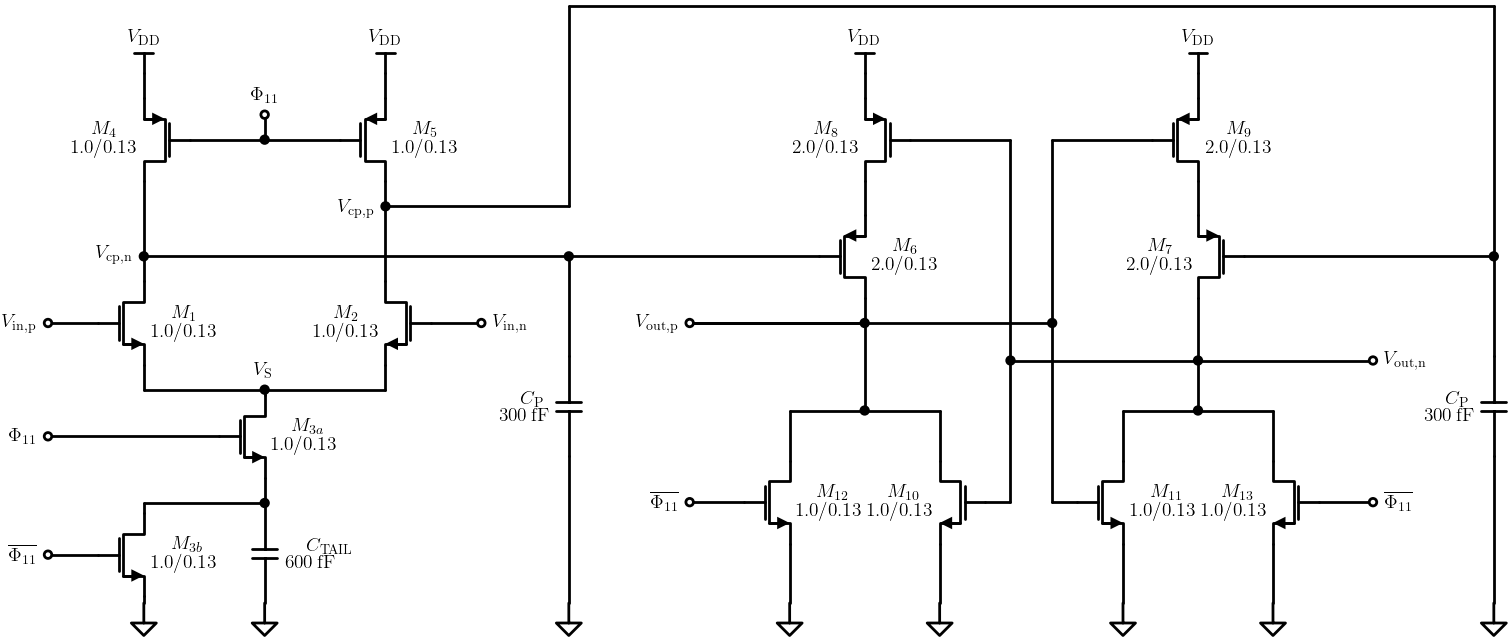

In [157]:
# Draw Dynamic-biasing DT comparator with W/L
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=14)

    # Pre-Amplifier
    # M1 / M4
    elm.Dot(open=True).label('$V_\mathrm{in,p}$', loc='left', ofst=0.15)
    startDot = d.here
    elm.Line().right().length(1)
    M1 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_1 \\$'+str(w_m12)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M1.drain).up().length(0.5).dot().label('$V_\mathrm{cp,n}$', loc='top', ofst=(0.25, 0.15))
    VcpnDot = d.here
    elm.Line().up().length(1.5)
    M4 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_4 \\$'+str(w_m45)+'/'+str(l))
    elm.Line().at(M4.source).up().length(0.5)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M4.gate).right().length(1.5).dot()
    d.push()
    elm.Line().up().length(0.5)
    elm.Dot(open=True).label('$\Phi_{11}$', loc='top', ofst=0.15)
    clkDot = d.here
    d.pop()

    # M2 / M5
    elm.Line().right().length(1.5)
    M5 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_5 \\$'+str(w_m45)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M5.source).up().length(0.5)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    vddDot = d.here
    elm.Line().at(M5.drain).down().length(0.5).dot().label('$V_\mathrm{cp,p}$', loc='top', ofst=(0.25, -0.15))
    VcppDot = d.here
    elm.Line().down().length(1.5)
    M2 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_2 \\$'+str(w_m12)+'/'+str(l))
    elm.Line().at(M2.gate).right().length(1)
    elm.Dot(open=True).label('$V_\mathrm{in,n}$', loc='right', ofst=0.15)

    # VS
    elm.Line().at(M1.source).down().length(0.5)
    elm.Line().right().tox(clkDot).dot().label('$V_\mathrm{S}$', loc='top', ofst=(1.15, 0.15))
    elm.Line().at(M2.source).down().length(0.5)
    elm.Line().left().tox(clkDot)

    # M3a / M3b / Ctail
    elm.Line().down().length(0.1)
    M3a = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{3a} \\$'+str(w_m3a)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M3a.gate).left().tox(startDot)
    elm.Dot(open=True).label('$\Phi_{11}$', loc='left', ofst=0.15)
    elm.Line().at(M3a.source).down().length(0.5).dot()
    d.push()
    elm.Capacitor().label(r'$C_\mathrm{TAIL} \\$ 600\,fF', loc='bottom', ofst=0.15)
    gndDot = d.here
    elm.GroundSignal()
    d.pop()
    elm.Line().left().tox(M1.source)
    elm.Line().down().length(0.2)
    M3b = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{3b} \\$'+str(w_m3b)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M3b.gate).left().tox(startDot)
    elm.Dot(open=True).label('$\overline{\Phi_{11}}$', loc='left', ofst=0.15)
    elm.Line().at(M3b.source).down().toy(gndDot)
    elm.GroundSignal()
    
    # Latch stage
    # Cpn
    elm.Line().at(VcpnDot).right().length(8.5).dot()
    CpnDot = d.here
    d.push()
    elm.Line().down().length(2)
    Cpn = elm.Capacitor().label(r'$C_\mathrm{P} \\$ 300\,fF', loc='top', ofst=0.15)
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # M6
    d.pop()
    elm.Line().right().length(5)
    M6 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_6 \\$'+str(w_m67)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M6.drain).down().length(0.5).dot()

    # Voutp
    d.push()
    elm.Line().left().length(3.5)
    elm.Dot(open=True).label('$V_\mathrm{out,p}$', loc='left', ofst=0.15)
    voutpDot = d.here
    d.pop()

    # M10 / M12
    elm.Line().down().length(1.75).dot()
    d.push()
    elm.Line().left().length(1.5)
    elm.Line().down().length(1.0)
    M12 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{12} \\$'+str(w_m1213)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M12.gate).left().tox(voutpDot)
    elm.Dot(open=True).label('$\overline{\Phi_{11}}$', loc='left', ofst=0.15)
    elm.Line().at(M12.source).down().toy(gndDot)
    elm.GroundSignal()
    d.pop()
    elm.Line().right().length(1.5)
    elm.Line().down().length(1.0)
    M10 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{10} \\$'+str(w_m1011)+'/'+str(l))
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # M8
    elm.Line().at(M6.source).up().toy(M5.drain)
    M8 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_8 \\$'+str(w_m89)+'/'+str(l))
    elm.Line().at(M8.source).up().toy(vddDot)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M8.gate).right().length(2)
    elm.Line().down().toy(M10.gate)
    xofM8M10con = d.here
    elm.Line().left().tox(M10.gate)

    # M11 / M13
    elm.Line().at(voutpDot).right().length(7.25).dot()
    d.push()
    elm.Line().down().toy(M10.gate)
    elm.Line().right().length(0.5)
    M11 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{11} \\$'+str(w_m1011)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M11.source).down().toy(gndDot)
    elm.GroundSignal()
    elm.Line().at(M11.drain).up().length(1.0)
    elm.Line().right().length(1.5).dot()
    d.push()
    elm.Line().right().length(1.5)
    elm.Line().down().length(1.0)
    M13 = elm.AnalogNFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{13} \\$'+str(w_m1213)+'/'+str(l))
    elm.Line().at(M13.source).down().toy(gndDot)
    elm.GroundSignal()
    d.pop()
    elm.Line().up().length(1).dot()
    d.push()
    elm.Line().right().length(3.5)
    elm.Dot(open=True).label('$V_\mathrm{out,n}$', loc='right', ofst=0.15)
    voutnDot = d.here
    elm.Line().at(M13.gate).right().tox(voutnDot)
    elm.Dot(open=True).label('$\overline{\Phi_{11}}$', loc='right', ofst=0.15)
    d.pop()
    d.push()
    elm.Line().left().tox(xofM8M10con).dot()

    # M7
    d.pop()
    elm.Line().up().toy(M6.drain)
    M7 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_7 \\$'+str(w_m67)+'/'+str(l))
    elm.Line().at(M7.source).up().toy(M8.drain)

    # M9
    M9 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_9 \\$'+str(w_m89)+'/'+str(l), ofst=-2.4).reverse()
    elm.Line().at(M9.source).up().toy(vddDot)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(M9.gate).left().length(2)
    elm.Line().down().toy(voutpDot)

    # Cpp
    elm.Line().at(M7.gate).right().length(5).dot()
    d.push()
    elm.Line().down().length(2)
    Cpp = elm.Capacitor().label(r'$C_\mathrm{P} \\$ 300\,fF', loc='top', ofst=0.15)
    elm.Line().down().toy(gndDot)
    elm.GroundSignal()

    # Connection back to Vcpp
    d.pop()
    elm.Line().up().length(5)
    elm.Line().left().tox(CpnDot)
    elm.Line().down().toy(VcppDot)
    elm.Line().left().tox(VcppDot)

    # Save the schematic
    d.save('figures/comparator/discrete_time/DT_comparator_dynamic_biasing_WL_circuit.svg')
    d.save('figures/comparator/discrete_time/DT_comparator_dynamic_biasing_WL_circuit.pdf')

## Dynamic-biasing DT comparator with buffers and SR-latch

Summary and final values

In [158]:
# Dynamic-biasing DT comparator with buffers and SR-latch

# All transistors in buffers and SR-Latch have the same size
w_mall = 1.0

# Get propagation delay (simulated)
tpd = 27.60

# Get energy per conversion (simulated)
epc = 1209.21

# Get input dc offset (simulated)
Voffs_in = 0.192e-3

# Get average input capacitance (simulated)
Cinp = 1.25e-15
Cinn = 1.38e-15


# Dynamic-biasing DT comparator vs. Dynamic-biasing DT comparator with buffers and SR-latch
# The input-referred noise pretty much stays the same. It might slightly change due to a different capacitive load.
# The propagation delay decreased from tpd = 49.64 ns (simulated) to tpd = 27.60 ns (simulated) --> / 1.8.
# The energy per conversion increased from epc = 426.18 fJ/conv (simulated) to epc = 1209.21 fJ/conv (simulated) --> * 2.84.
# The input dc offset decreased from Voffs_in = 1.55 mV (simulated) to Voffs_in = 0.19 mV (simulated) --> / 8.1.
# The average input capacitance Cinp = 1.25 fF / Cinn = 1.38 fF (simulated) stays the same.


# Conclusion:
# It can be seen that the propagation delay is smaller and the rising edge of the output is much steeper.
# As a consequence, also the input dc offset decreases to under 1mV for default parameters.
# However, the CACE simulations over different corners, temperatures and common-mode voltages showed that the offset voltage can vary a lot.
# For that reason, the choice of a 7-Bit DAC from above is retained.
# Unfortunately, the additional transistors for the inverter, the two buffers and the SR latch increase the energy per conversion by a factor of approx. 3.
# Since these transistors already have minimum length, the energy per conversion can not be further reduced.

In [159]:
# print out final design values
print('Dynamic-biasing DT comparator with buffers and SR-latch W/L ratios:')
print('------------------------------------')
print('Differential Input Stage')
print('NMOS M1: W =', w_m12,'um, L =', l,'um')
print('NMOS M2: W =', w_m12,'um, L =', l,'um')
print('NMOS M3a: W =', w_m3a,'um, L =', l,'um')
print('NMOS M3b: W =', w_m3b,'um, L =', l,'um')
print('PMOS M4: W =', w_m45,'um, L =', l,'um')
print('PMOS M5: W =', w_m45,'um, L =', l,'um')
print('Capacitor Cp =', round(float(Cp * 1e15), 2),'fF')
print('Capacitor Ctail =', round(float(Ctail * 1e15), 2),'fF')
print('------------------------------------')
print('Output Latch')
print('PMOS M6: W =', w_m67,'um, L =', l,'um')
print('PMOS M7: W =', w_m67,'um, L =', l,'um')
print('PMOS M8: W =', w_m89,'um, L =', l,'um')
print('PMOS M9: W =', w_m89,'um, L =', l,'um')
print('NMOS M10: W =', w_m1011,'um, L =', l,'um')
print('NMOS M11: W =', w_m1011,'um, L =', l,'um')
print('NMOS M12: W =', w_m1213,'um, L =', l,'um')
print('NMOS M13: W =', w_m1213,'um, L =', l,'um')
print('------------------------------------')
print('Inverter / Buffers / SR-Latch')
print('All NMOS: W =', w_mall,'um, L =', l,'um')
print('All PMOS: W =', w_mall,'um, L =', l,'um')
print('------------------------------------')
print('Design Results')
print('Max. input capacitance: Cin =', round(float(cgg_m12) * 1e15, 2), 'fF (gm/ID)')
print('Average positive input capacitance from 1Hz to 1GHz: Cinp =', round(Cinp * 1e15, 2), 'fF (simulated)')
print('Average negative input capacitance from 1Hz to 1GHz: Cinn =', round(Cinn * 1e15, 2), 'fF (simulated)')
print('Max. total (integrated) input-referred noise: Vn_in_rms =', round(float(Vn_in_rms_final) * 1e6, 2), 'uVrms (gm/ID + formula)')
print('Propagation delay: tpd =', round(float(tpd), 2), 'ns (simulated)')
print('Energy per conversion: epc =', round(float(epc), 2), 'fJ/conv (simulated)')
print('Max. input dc offset (= 0.5 LSB): Voffs_in_max =', round(float(half_lsb * 1e3), 2), 'mV (estimated)')
print('Input dc offset: Voffs_in =', round(float(Voffs_in * 1e3), 2), 'mV (simulated)')
print('------------------------------------')

Dynamic-biasing DT comparator with buffers and SR-latch W/L ratios:
------------------------------------
Differential Input Stage
NMOS M1: W = 1.0 um, L = 0.13 um
NMOS M2: W = 1.0 um, L = 0.13 um
NMOS M3a: W = 1.0 um, L = 0.13 um
NMOS M3b: W = 1.0 um, L = 0.13 um
PMOS M4: W = 1.0 um, L = 0.13 um
PMOS M5: W = 1.0 um, L = 0.13 um
Capacitor Cp = 300.0 fF
Capacitor Ctail = 600.0 fF
------------------------------------
Output Latch
PMOS M6: W = 2.0 um, L = 0.13 um
PMOS M7: W = 2.0 um, L = 0.13 um
PMOS M8: W = 2.0 um, L = 0.13 um
PMOS M9: W = 2.0 um, L = 0.13 um
NMOS M10: W = 1.0 um, L = 0.13 um
NMOS M11: W = 1.0 um, L = 0.13 um
NMOS M12: W = 1.0 um, L = 0.13 um
NMOS M13: W = 1.0 um, L = 0.13 um
------------------------------------
Inverter / Buffers / SR-Latch
All NMOS: W = 1.0 um, L = 0.13 um
All PMOS: W = 1.0 um, L = 0.13 um
------------------------------------
Design Results
Max. input capacitance: Cin = 1.61 fF (gm/ID)
Average positive input capacitance from 1Hz to 1GHz: Cinp = 1.25 fF 